#**Prediction of students dropout and academic success**

#Índex


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
import seaborn as sns

import pandas
from pandas import plotting

%matplotlib inline

In [ ]:
#WEB DE LES  DADES
#https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [ ]:
# lectura del dataset des de la web
!pip3 install -U ucimlrepo
!pip3 install --upgrade certifi

from ucimlrepo import fetch_ucirepo

# fetch dataset
#predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Now try to fetch the dataset again
dades = fetch_ucirepo(id=697)
# data (as pandas dataframes)
X = dades.data.features
Y = dades.data.targets

# metadata
#print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(dades.variables)
dades2=dades.data

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

**Exemple primeres 20 files del dataset amb el seu Target**

In [ ]:
print(X.head(20))
print(Y.head(20))

    Marital Status  Application mode  Application order  Course  \
0                1                17                  5     171   
1                1                15                  1    9254   
2                1                 1                  5    9070   
3                1                17                  2    9773   
4                2                39                  1    8014   
5                2                39                  1    9991   
6                1                 1                  1    9500   
7                1                18                  4    9254   
8                1                 1                  3    9238   
9                1                 1                  1    9238   
10               1                 1                  1    9670   
11               1                 1                  1    9500   
12               1                 1                  2    9853   
13               1                53                  1    925



---


# Inspecció de les dades

In [ ]:
#columnes del dataset
print("Informació de cada columna: ")
names=dades['data']['features'].info()

print("Comprovació dels noms de les columnes: ")
print(dades2.features.columns)

print("-----------")
print("Estadistiques de les Columnes (Variables) (X):")
descript_X = X.describe(include="all")
print(descript_X)

print("Descripció dels valors de Columnes :")
valunicX=X.apply(lambda col:col.unique())
print(valunicX)

print("-----------")
print("Estadistiques de les Files (Target) (y):")
descript_Y = Y.describe(include="all")
print(descript_Y)

print("Descripció dels valors de Target :")
valunicY=dades2.targets['Target'].unique()
print(valunicY)
#Fixar sobre tot amb els valors de UNIQUE i veure possibles errades

Informació de cada columna: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qua

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#PER ELS COLORS!!!

num_colors = 3
cmap = cm.get_cmap('plasma', num_colors)

# Get a list of colors in names (not codes)
colors = [cmap(i) for i in range(num_colors)]

# Display the list of colors
print(colors)


[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0), (0.940015, 0.975158, 0.131326, 1.0)]


<ipython-input-27-55405f1e5a92>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', num_colors)


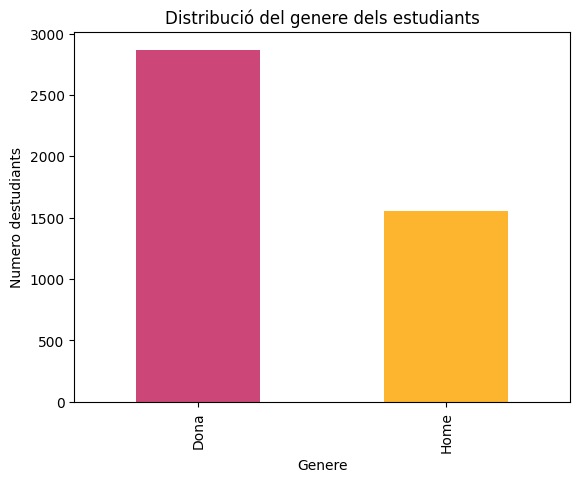

In [ ]:
#Relacio del genere entre els estudiants
gender_counts = dades2.features['Gender'].value_counts()
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0)]

gender_counts.plot(kind='bar',color=colors2)

plt.xlabel('Genere')
plt.xticks([0, 1], ['Dona', 'Home'])#1 male 0 female
plt.ylabel('Numero destudiants')
plt.title('Distribució del genere dels estudiants')

plt.show()

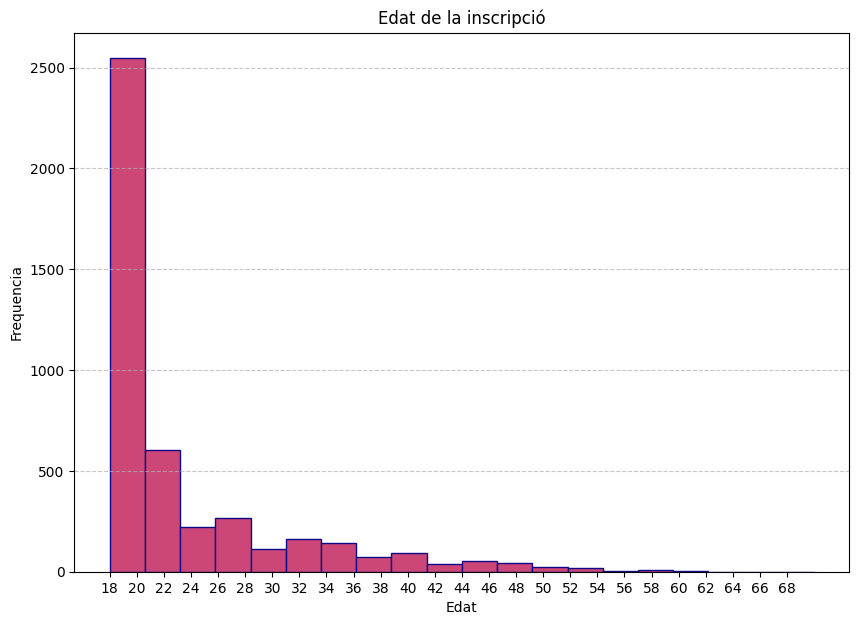

In [ ]:
#Relació d'edat dels estudiants
num_bins = 20
age_range = (18, 70)

plt.figure(figsize=(10, 7))
plt.hist(dades2.features["Age at enrollment"], bins=num_bins,range=age_range,color=(0.798216, 0.280197, 0.469538, 1.0), edgecolor=(0.050383, 0.029803, 0.527975, 1.0))

plt.title("Edat de la inscripció")
plt.xlabel("Edat")
plt.ylabel("Frequencia")
plt.xticks(range(18, 70, 2))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

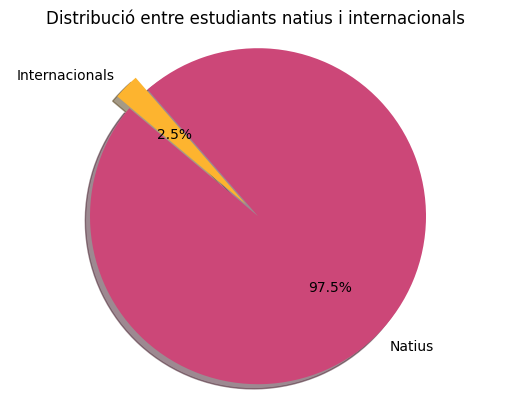

In [ ]:
# Relacion entre estudiants natius i internacionals International = 0, Nationality = 1
nat = dades2.features[(dades2.features["International"] == 0) & (dades2.features["Nacionality"] == 1)].shape[0]
inter = dades2.features[dades2.features["International"] == 1].shape[0]

#pie chart
labels = ['Natius', 'Internacionals']
sizes = [nat, inter]
explode = (0.1, 0)
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0)]

plt.pie(sizes, explode=explode, labels=labels, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribució entre estudiants natius i internacionals ')
plt.show()

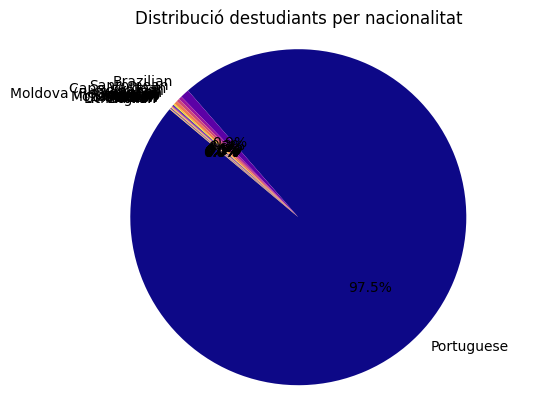

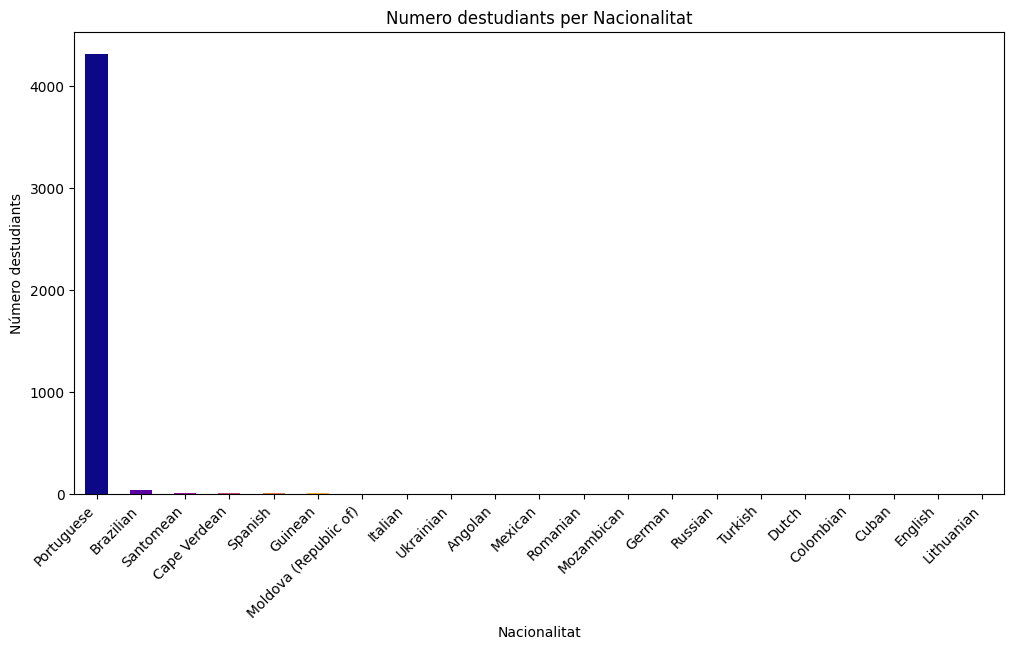

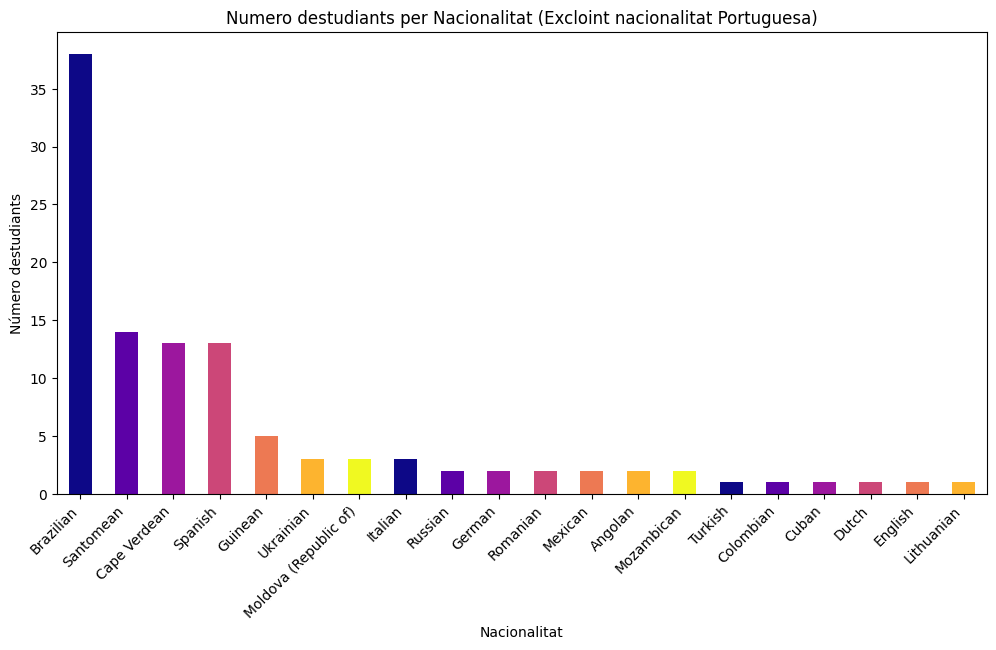

In [ ]:
#Relació entre les diferents nacionalitats
nat_noms = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
    14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
    24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
    41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}
nat_num = dades2.features['Nacionality'].map(nat_noms).value_counts()
colors=[(0.050383, 0.029803, 0.527975, 1.0),
 (0.362553, 0.003243, 0.649245, 1.0),
  (0.610667, 0.090204, 0.619951, 1.0),
   (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
     (0.993814, 0.704741, 0.183043, 1.0),
        (0.940015, 0.975158, 0.131326, 1.0)]

#Pie chart nacionalitats
labels = nat_num.index
sizes = nat_num.values
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribució destudiants per nacionalitat')
plt.show()

#bar chart nacioalitats
plt.figure(figsize=(12, 6))
nat_num.plot(kind='bar', color=colors)
plt.xlabel('Nacionalitat')
plt.ylabel('Número destudiants')
plt.title('Numero destudiants per Nacionalitat')
plt.xticks(rotation=45, ha='right')
plt.show()

#Extreure la nacionalitat Portuguesa- Contar només els internacionals
nat_num = dades2.features['Nacionality'].map(nat_noms)
nat_num = nat_num[nat_num != 'Portuguese'].value_counts()

plt.figure(figsize=(12, 6))
nat_num.plot(kind='bar', color=colors)
plt.xlabel('Nacionalitat')
plt.ylabel('Número destudiants')
plt.title('Numero destudiants per Nacionalitat (Excloint nacionalitat Portuguesa)')
plt.xticks(rotation=45, ha='right')

plt.show()

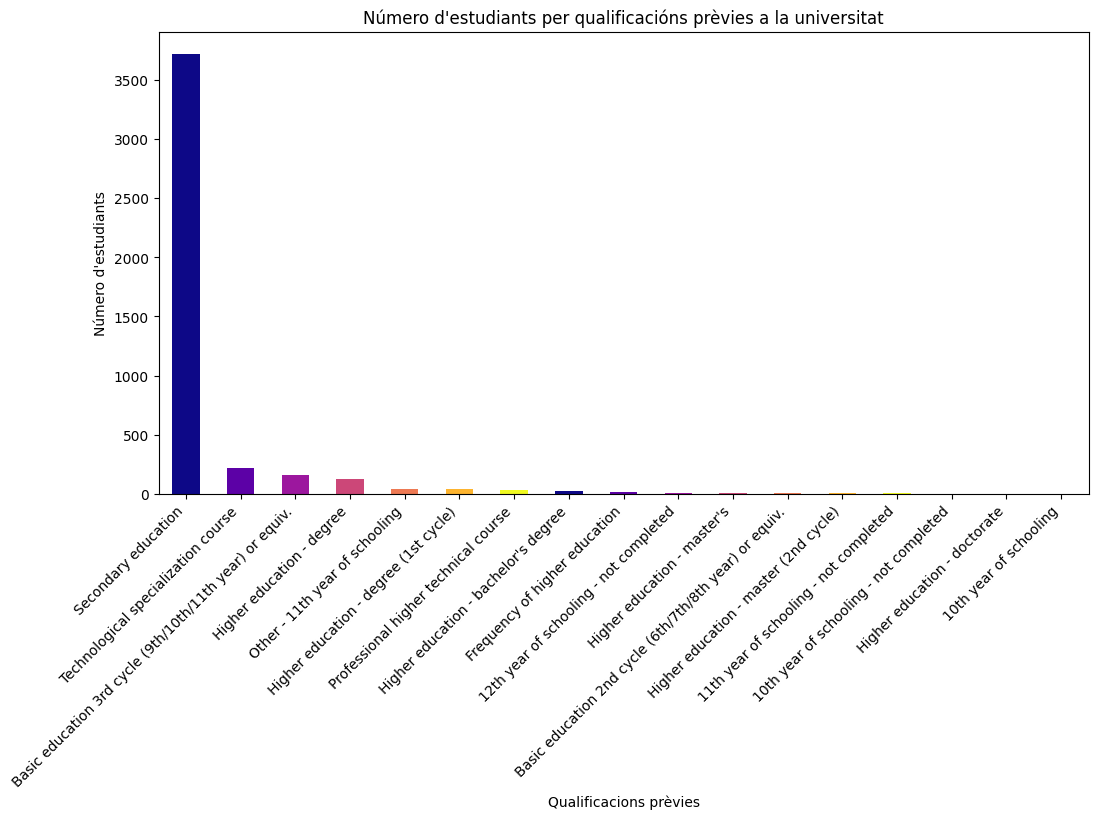

In [ ]:
#Qualificació previa a la universitat
prev_noms = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master's",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}
prev_num = dades2.features['Previous qualification'].map(prev_noms).value_counts()

colors=[(0.050383, 0.029803, 0.527975, 1.0),
 (0.362553, 0.003243, 0.649245, 1.0),
  (0.610667, 0.090204, 0.619951, 1.0),
   (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
     (0.993814, 0.704741, 0.183043, 1.0),
        (0.940015, 0.975158, 0.131326, 1.0)]

plt.figure(figsize=(12, 6))
plt.xlabel("Qualificacions prèvies")
plt.ylabel("Número d'estudiants")
plt.title("Número d'estudiants per qualificacións prèvies a la universitat")
prev_num.plot(kind='bar',color=colors)
plt.xticks(rotation=45, ha='right')

plt.show()

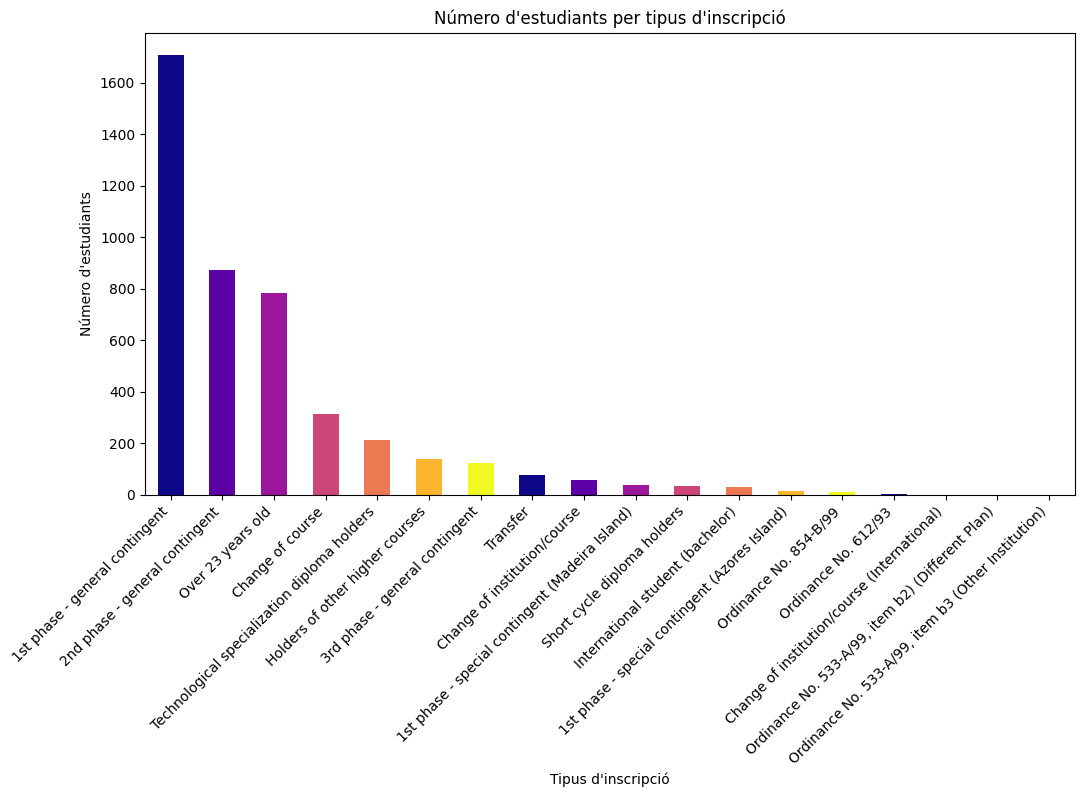

In [ ]:
# Relacio estudiants per tipus d'aplicació
applic_nom = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}
applic_num = dades2.features['Application mode'].map(applic_nom).value_counts()

colors=[(0.050383, 0.029803, 0.527975, 1.0),
 (0.362553, 0.003243, 0.649245, 1.0),
  (0.610667, 0.090204, 0.619951, 1.0),
   (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
     (0.993814, 0.704741, 0.183043, 1.0),
        (0.940015, 0.975158, 0.131326, 1.0)]

plt.figure(figsize=(12, 6))
plt.xlabel("Tipus d'inscripció")
plt.ylabel("Número d'estudiants")
plt.title("Número d'estudiants per tipus d'inscripció")
applic_num.plot(kind='bar',color=colors)
plt.xticks(rotation=45, ha='right')

plt.show()


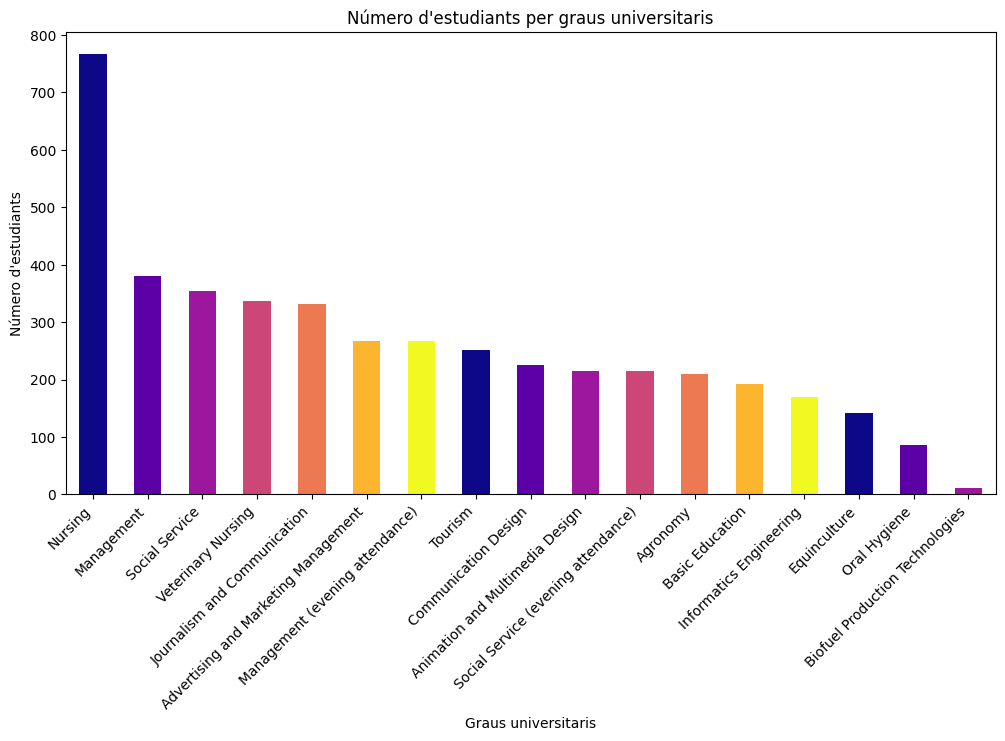

In [ ]:
#Relació del grau i el nombre d'estudiants
course_noms = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

course_counts = dades2.features['Course'].map(course_noms).value_counts()

colors = [
    (0.050383, 0.029803, 0.527975, 1.0),
    (0.362553, 0.003243, 0.649245, 1.0),
    (0.610667, 0.090204, 0.619951, 1.0),
    (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
    (0.993814, 0.704741, 0.183043, 1.0),
    (0.940015, 0.975158, 0.131326, 1.0)
]

plt.figure(figsize=(12, 6))
plt.xlabel("Graus universitaris")
plt.ylabel("Número d'estudiants")
plt.title("Número d'estudiants per graus universitaris")
course_counts.plot(kind='bar', color=colors)
plt.xticks(rotation=45, ha='right')

plt.show()


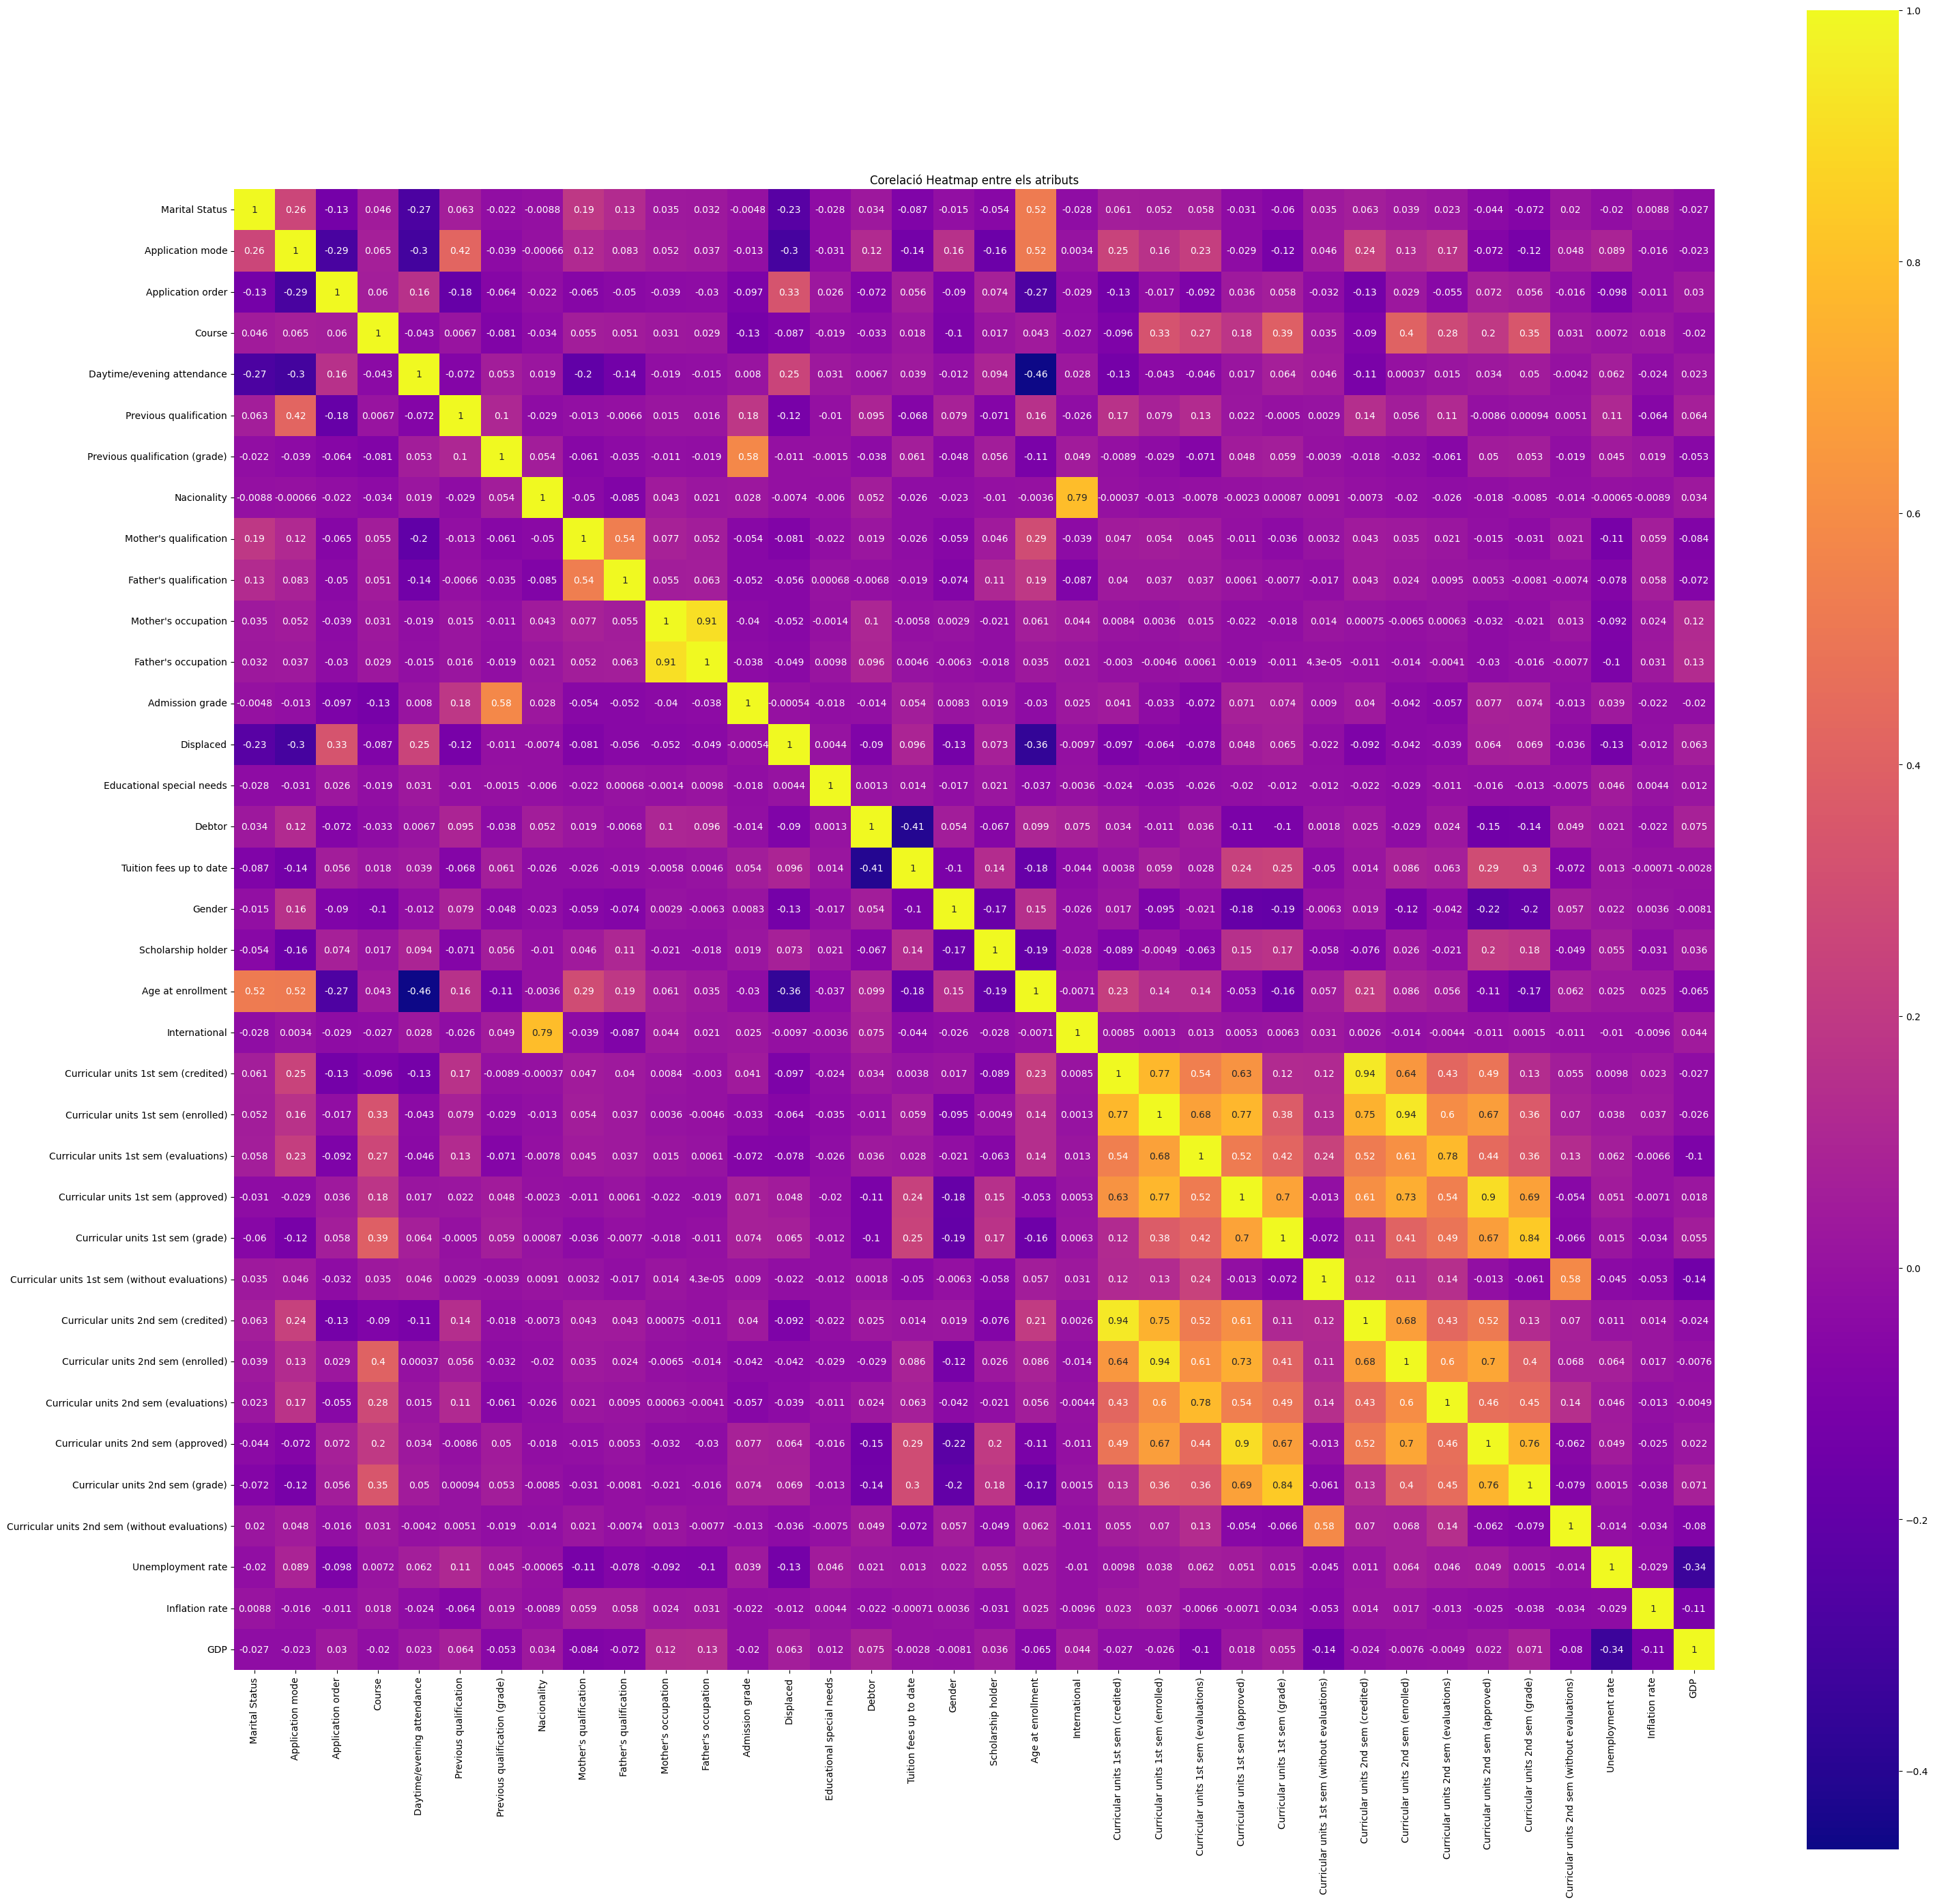

In [ ]:
#Matriu de correlació entre atributs
corr = dades2.features.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(corr, cmap='plasma', annot=True, square=True)

plt.title("Corelació Heatmap entre els atributs")
plt.show()

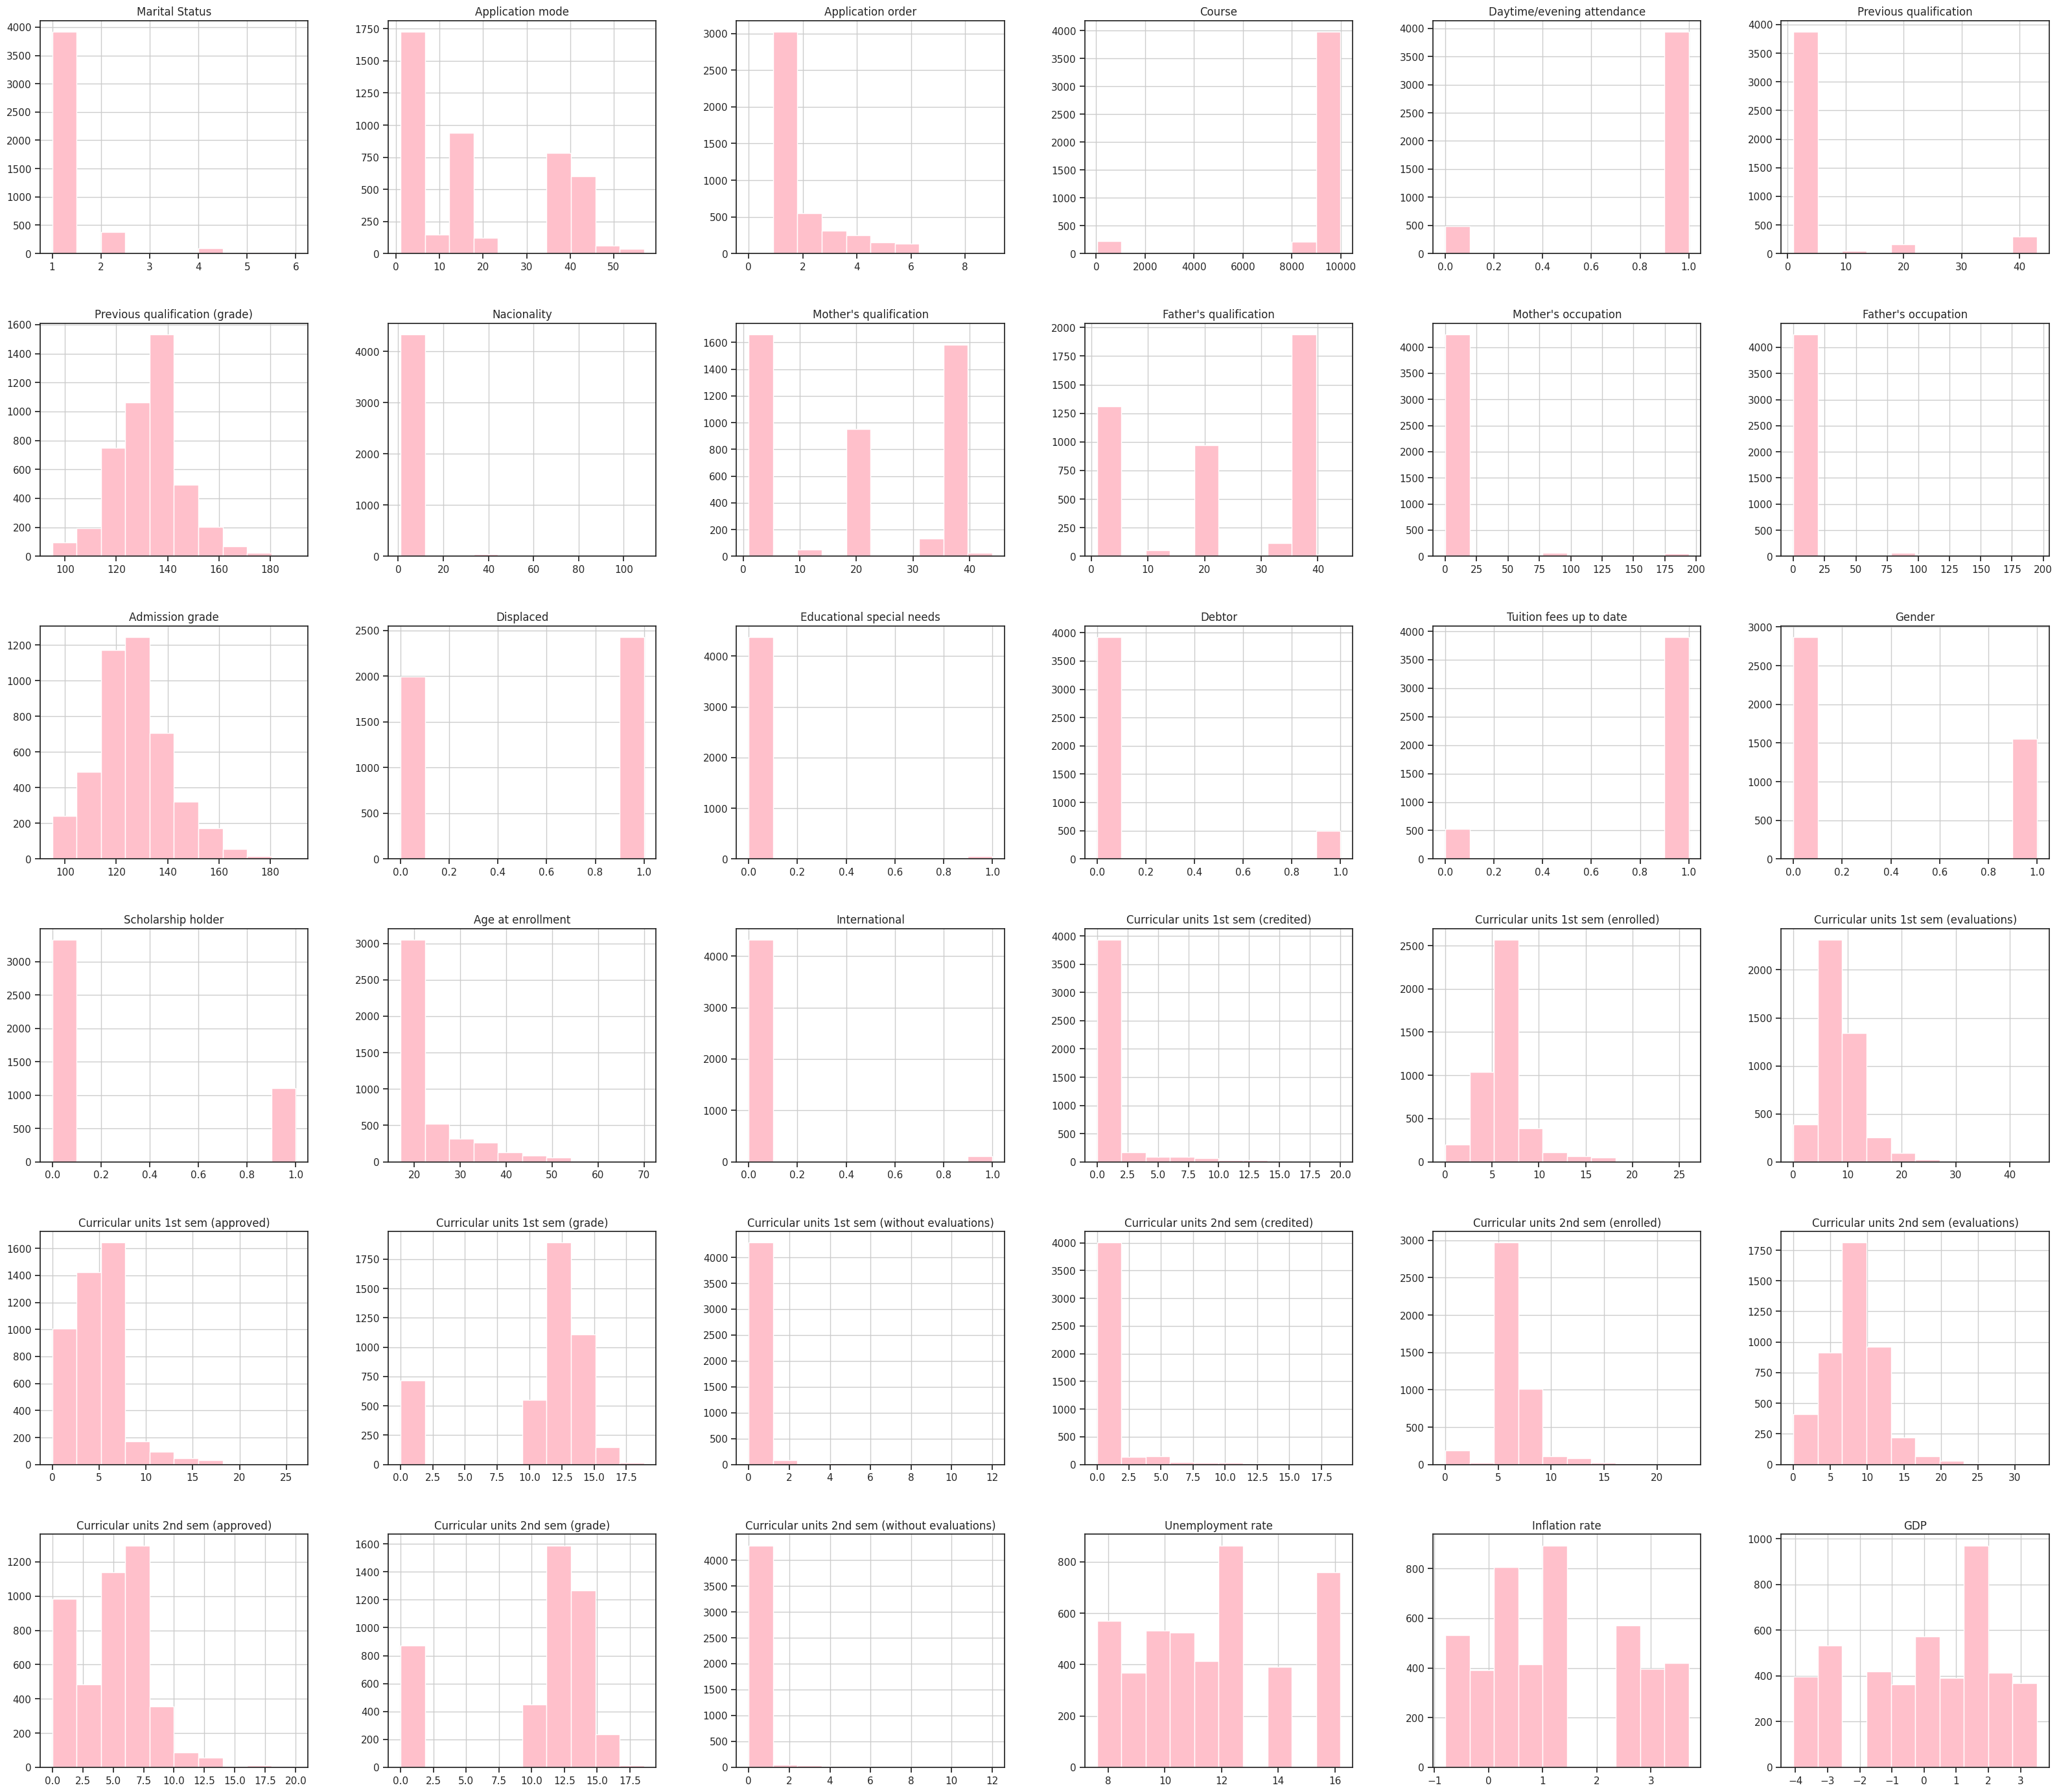

In [ ]:
##histogram - visual representation
sns.set_theme(style = 'ticks')
dades2.features.hist(bins=10, figsize=(40, 35), grid=True, legend=None,color='pink');

##Relació de les dades amb l'Objectiu

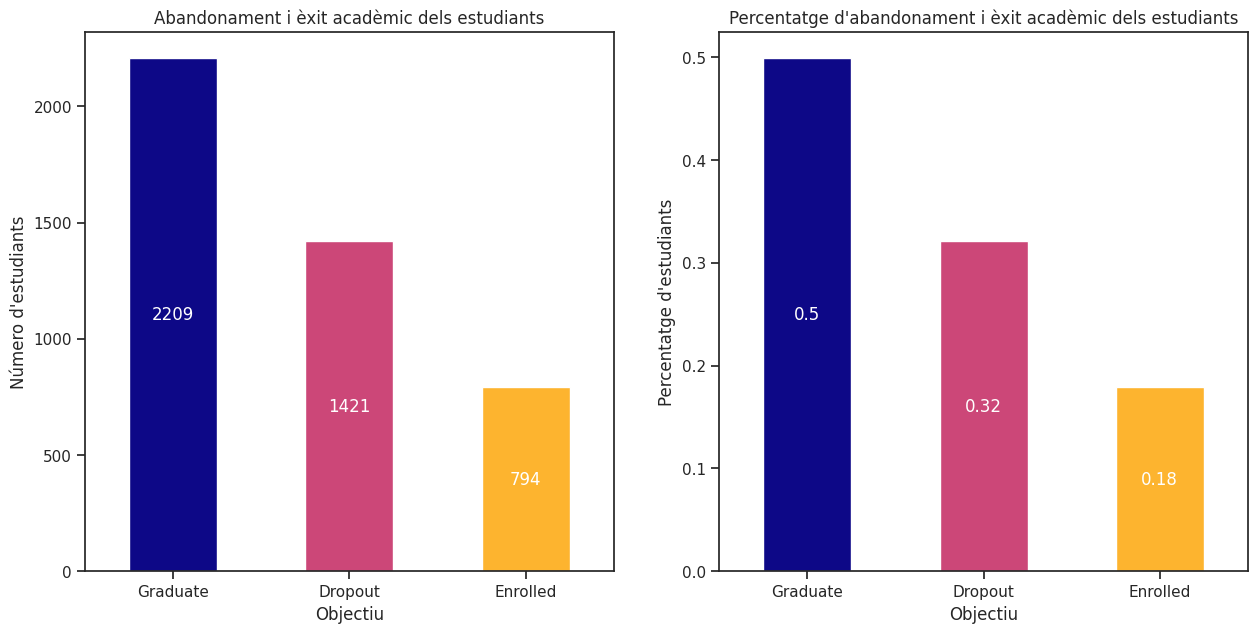

In [ ]:
#Estadistiques OBJECTIU
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
colors =[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0),(0.993814, 0.704741, 0.183043, 1.0)]

#amb valors reals
dades2.targets["Target"].value_counts().plot.bar(
    ax=axes[0],
    title="Abandonament i èxit acadèmic dels estudiants",
    ylabel="Número d'estudiants",
    xlabel="Objectiu",
    rot=0,
    color=colors
)
#amb percentatges
dades2.targets["Target"].value_counts(normalize=True).plot.bar(
    ax=axes[1],
    title="Percentatge d'abandonament i èxit acadèmic dels estudiants",
    ylabel="Percentatge d'estudiants",
    xlabel="Objectiu",
    rot=0,
    color=colors
)

axes[0].bar_label(axes[0].containers[0], label_type="center", color='w')
axes[1].bar_label(axes[1].containers[0], fmt='%.2g', label_type="center", color='w')

plt.show()

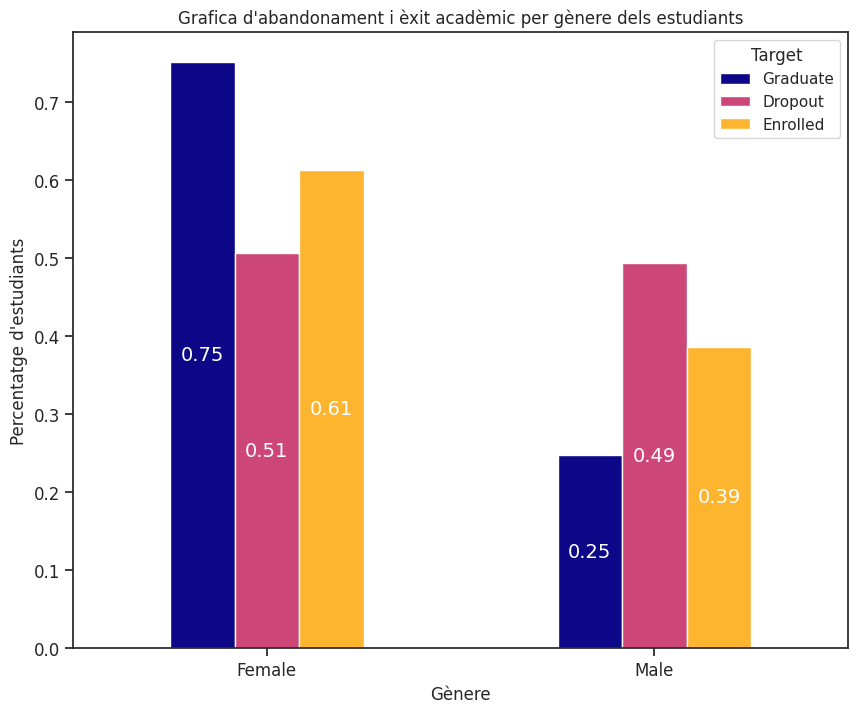

In [ ]:
#Relacio de l'objectiu amb el genere del estudiant
colors =[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0),(0.993814, 0.704741, 0.183043, 1.0)]

perc1 = pd.crosstab(dades2.targets["Target"], dades2.features["Gender"]).apply(lambda r: r / r.sum(), axis=1)
perc1=perc1.reindex(["Graduate", "Dropout", "Enrolled"])
ax = perc1.transpose().plot.bar(
    figsize = (10,8),
    title = "Grafica d'abandonament i èxit acadèmic per gènere dels estudiants",
    xlabel= "Gènere",
    ylabel = "Percentatge d'estudiants",
    rot=0,
    color=colors,
    fontsize = 12
)
ax.set_xticklabels(("Female", "Male"))

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f',label_type='center', fontsize=14, color='w')


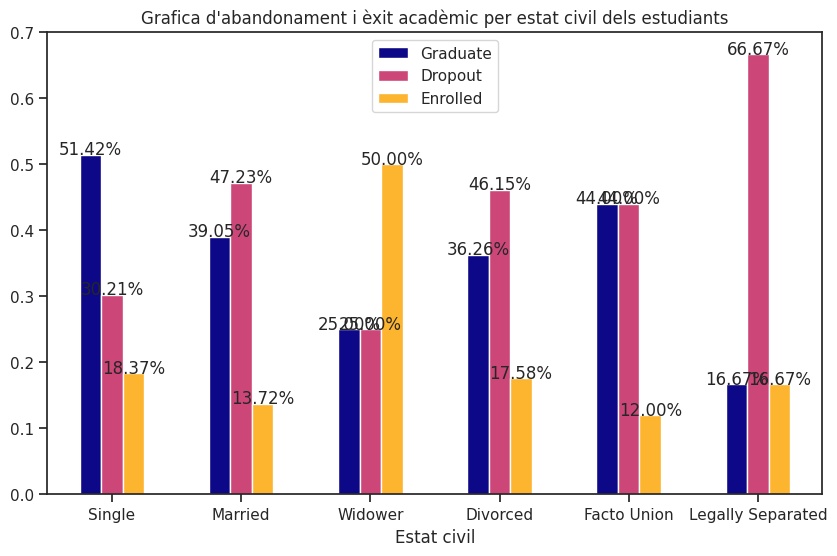

In [ ]:
#Relació de l'objectiu amb l'estat civil dels estudiants

marital_status_perc = pd.crosstab(dades2.features["Marital Status"], dades2.targets["Target"], normalize='index')
marital_status_perc = marital_status_perc.reindex(columns=["Graduate", "Dropout", "Enrolled"])
colors = [(0.050383, 0.029803, 0.527975, 1.0),
          (0.798216, 0.280197, 0.469538, 1.0),
          (0.993814, 0.704741, 0.183043, 1.0)]

ax = marital_status_perc.plot(kind="bar", figsize=(10, 6), title="Grafica d'abandonament i èxit acadèmic per estat civil dels estudiants", color=colors)

plt.xlabel("Estat civil")
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'], rotation=0)

# Llegenda
ax.legend(["Graduate", "Dropout", "Enrolled"], loc=9)

#calcular percentatges per cada apartat
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height), ha='center', fontsize=12)

plt.show()

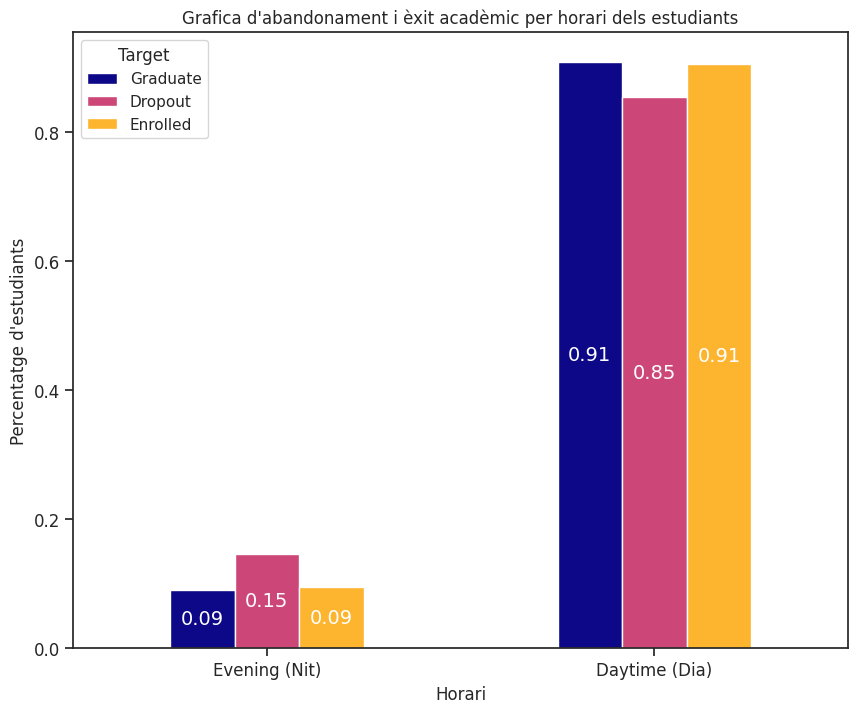

In [ ]:
#Relacio de l'objectiu amb el l'horari del estudiant
colors =[(0.050383, 0.029803, 0.527975, 1.0), (0.798216, 0.280197, 0.469538, 1.0),(0.993814, 0.704741, 0.183043, 1.0)]

perc1 = pd.crosstab(dades2.targets["Target"], dades2.features["Daytime/evening attendance"]).apply(lambda r: r / r.sum(), axis=1)
perc1=perc1.reindex(["Graduate", "Dropout", "Enrolled"])
ax = perc1.transpose().plot.bar(
    figsize = (10,8),
    title = "Grafica d'abandonament i èxit acadèmic per horari dels estudiants",
    xlabel= "Horari",
    ylabel = "Percentatge d'estudiants",
    rot=0,
    color=colors,
    fontsize = 12
)
ax.set_xticklabels(("Evening (Nit)", "Daytime (Dia)"))

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f',label_type='center', fontsize=14, color='w')


---
#   Preprocessament de les dades




## Preprocessament

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [ ]:
#tornar a carregar dades per possibles modificacions anteriors des del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
dades_p = pd.read_csv('drive/My Drive/MIDA/data.csv',sep=';')

dades_p.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
#mirar si hi han atributs buits
atr_buit = dades_p.columns.isnull().sum()

#mirar si hi han objectiu buit
obj_buit = dades_p["Target"].isnull().sum()

print("Valors buits dels atributs: ")
print(atr_buit)

print("\nValors buits del objectiu: ")
print(obj_buit)


Valors buits dels atributs: 
0

Valors buits del objectiu: 
0


In [ ]:
#mirar si hi han files duplicades
dup_fil =dades_p[dades_p.duplicated(keep=False)]
dup_num = dup_fil.sum()

print("Numero de files duplicades:")
print(dup_num)

#mirar les files duplicades
files = dades_p[dup_fil]
print("Files duplicades :")
print(files)

print("Si llista surt NAN significa que no hi ha cap fila duplicada")

Numero de files duplicades:
Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0


S'han eliminat correctament els atributs triats i passa a ser un dataset de 37 columnes a 31 columnes amb tots els atributs numerals (no categorics) i amb només els estudiants o que ja s'han graduat o han abandonat

## Atributs relacionats amb l'objectiu
Revisar cada atribut la seva relació amb l'objectiu, per aixi aconseguir una millor comprensió de les relacions dins del dataset.
Treure els estudiants que estan estudiant actualment ja que només volem els que ja s'han graduat o ho han abandonat.


In [ ]:
#tornar a carregar dades per possibles modificacions anteriors des del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
dades_p = pd.read_csv('drive/My Drive/MIDA/data.csv',sep=';')

dades_p.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
dades_p.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
print("Verificar que tots els atributs i targets siguin de tipus numeral")
dades_p.info()
print("Si el Dtype(tipus de variable) és int64 o float64 significa que és numeral. ")

Verificar que tots els atributs i targets siguin de tipus numeral
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424

In [ ]:
#Target orignalment de tipus categoric
# Eliminar els estudiants que estan actualment estudiant
print("Abans treure estudiants que actualment esta estudien: ")
print(dades_p.loc[:,'Target'].value_counts())
print("Estudiants totals",dades_p['Target'].value_counts().sum(),'\n')

#Treure els estudiants Enrolled -> fixarem en si s'han graduat o no
print("Despres de treure els estudiants que actualment estudien: ")
dades_p=dades_p.loc[(dades_p['Target']=='Graduate') | (dades_p['Target'] == 'Dropout')].copy()
print(dades_p.loc[:,'Target'].value_counts())
print("Estudiants totals",dades_p['Target'].value_counts().sum(),'\n')

#Canviar de categoric a NUMERAL
print("----------")
print("Canviar el target d'un atribut categoric a numeral: ")
dades_p['Target'] =LabelEncoder().fit_transform(dades_p['Target'])
print(dades_p.loc[:,'Target'].value_counts())
print("Estudiants totals",dades_p['Target'].value_counts().sum(),'\n')

print("--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet")

Abans treure estudiants que actualment esta estudien: 
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64
Estudiants totals 4424 

Despres de treure els estudiants que actualment estudien: 
Graduate    2209
Dropout     1421
Name: Target, dtype: int64
Estudiants totals 3630 

----------
Canviar el target d'un atribut categoric a numeral: 
1    2209
0    1421
Name: Target, dtype: int64
Estudiants totals 3630 

--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet


In [ ]:
#Dividir els atributs per tipus i veure la seva relació amb l'objectiu

#Dades demogràfiques
demo= dades_p[["Marital status", "Nacionality", "Displaced", "Gender",
              "Educational special needs", "Age at enrollment", "International", "Target"]]

#Dades Socio Economiques
soec=dades_p[["Mother's qualification", "Father's qualification", "Mother's occupation",
             "Father's occupation",
      "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

#Dades academiques
acad=dades_p[['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t',
             'Previous qualification','Previous qualification (grade)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

#Dades del proces inscripció
insc=dades_p[['Unemployment rate', 'Inflation rate','Admission grade','GDP','Target']]

#Comprovar que tots els atributs han estat redistribuits
atributs_falten = set(dades_p.columns) - set(soec.columns)- set(demo.columns)- set(acad.columns)- set(insc.columns)
print("Els atributs que falta redistribuir: ",atributs_falten)

Els atributs que falta redistribuir:  set()


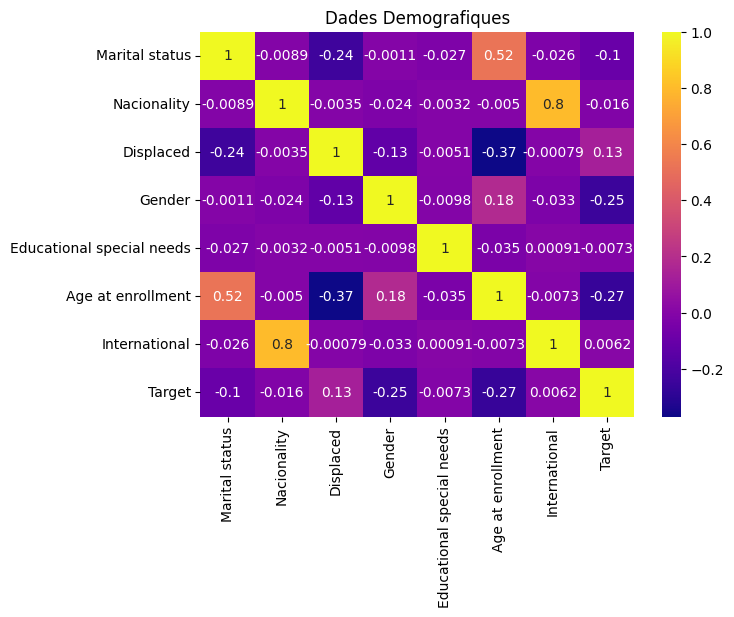

In [ ]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(demo.corr(), annot=True, cmap="plasma")
plt.title("Dades Demografiques")
plt.show()

Es pot observar que els atributs que tenen més correlació són: **International/Nacionality**

  La majoria d'estudiants son *Portuguesos* i ens podria portar problemes d'influència en els models de classificació

Els altres atributs tenen una correlació correcta amb el Target.

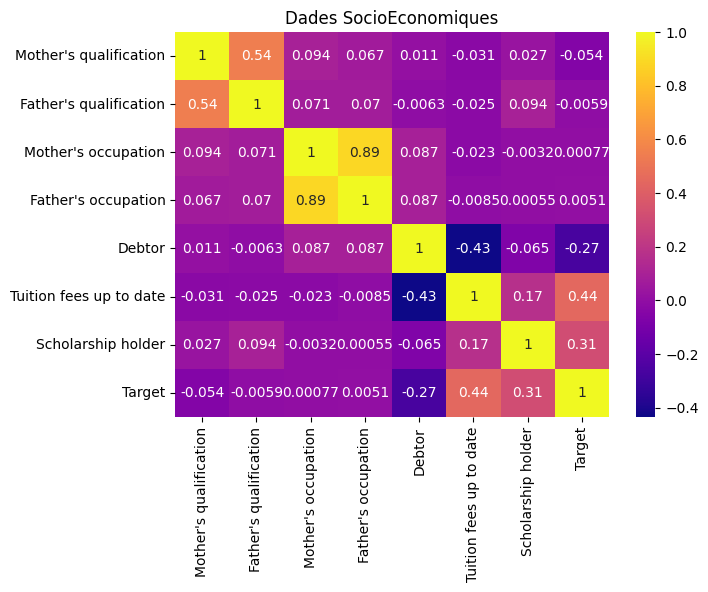

In [ ]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(soec.corr(), annot=True, cmap="plasma")
plt.title("Dades SocioEconomiques")
plt.show()

Es pot observar que els atributs que tenen més correlació són: **Father's occupation/Mother's occupation**  pero és un atribut interessant per veure la seva influència en els models.

Els altres atributs tenen una correlació correcta amb el Target.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


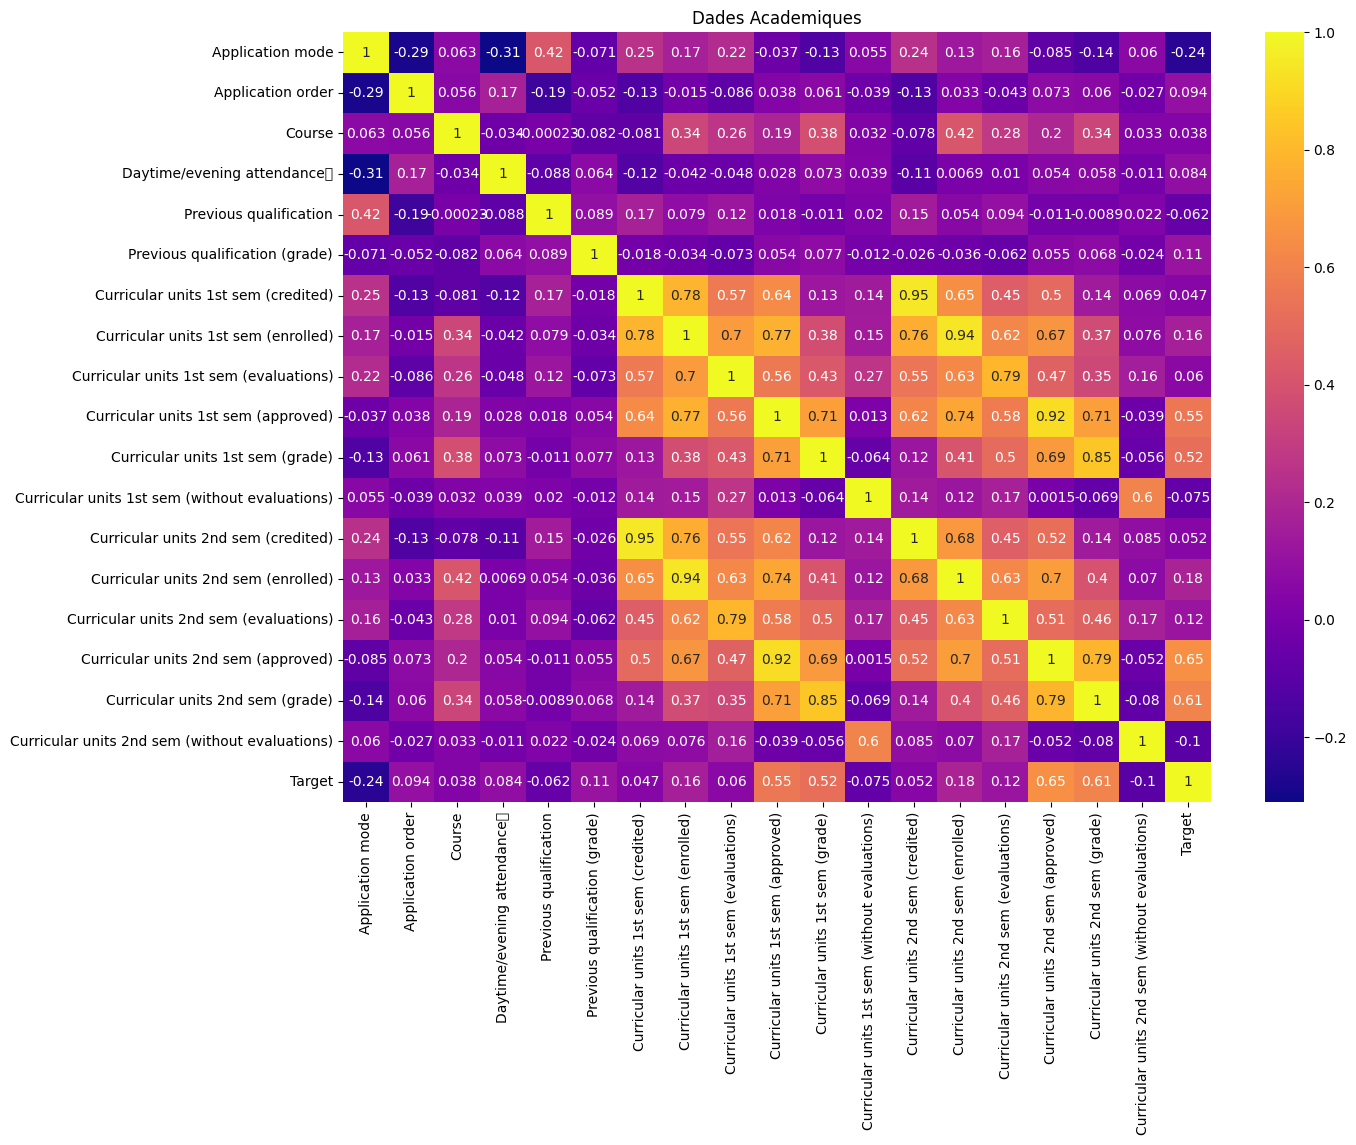

In [ ]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(acad.corr(), annot=True, cmap="plasma")
plt.title("Dades Academiques")
plt.show()

Es pot observar que els atributs que tenen més correlació són:

**Curricular units 1st/2nd sem (credited)**

**Curricular units 1st/2nd sem (enrolled)**

**Curricular units 1st/2nd sem (evaluations)**

**Curricular units 1st/2nd sem (approved)**

**Curricular units 1st/2nd sem (grade)**

 Prou elevats ( 0.80 en amunt) per afectar en el dataset.

Els altres atributs tenen una correlació correcta amb el Target.

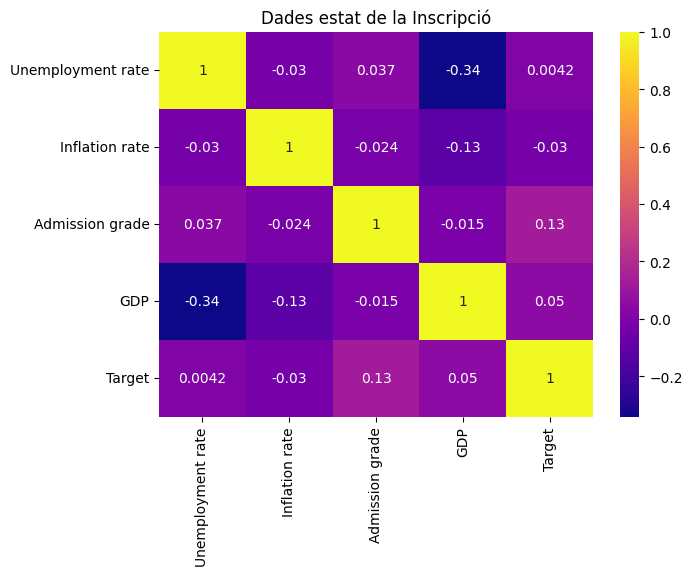

In [ ]:
#Veure la relació amb l'objectiu fent servir matrius de corelació- heatmaps

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(insc.corr(), annot=True, cmap="plasma")
plt.title("Dades estat de la Inscripció")
plt.show()

Els atributs tenen una correlació correcta amb el target


### Prova eliminacó d'atributs amb més correlació

In [ ]:
#Atributs amb alta correlació amb l'objectiu treure del dataset
atributs_treure=dades_p[[
    'Nacionality','Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)'
]]
dades_noat=dades_p.copy()
dades_noat.drop(columns=atributs_treure.columns, inplace=True)

dades_noat.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Mother's qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3                           122.0                      38   
4                           100.0                      37   

   Father's qualification  Mother's occupation  ...  \
0                      12                    5  ...   
1                       3                    3  ...   
2                      37                    9  ...   
3                      37                    5  ...   
4                      38                    9  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       1  
2             1.4  1.74       0  
3            -0.8 -3.12       1  
4            -0.3  0.79       1  

[5 rows x 31 columns]

In [ ]:
#Comprovació del preprocessament
dades_og= pd.read_csv('drive/My Drive/MIDA/data.csv',sep=';')
print("Dades originals:",dades_og.shape)
print("Dades sent preprocessades: (nomes graduats/no graduats) ",dades_p.shape)
print("Dades completament preprocessades (sense atributs amb alta correlació):",dades_noat.shape)

Dades originals: (4424, 37)
Dades sent preprocessades: (nomes graduats/no graduats)  (3630, 37)
Dades completament preprocessades (sense atributs amb alta correlació): (3630, 31)


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


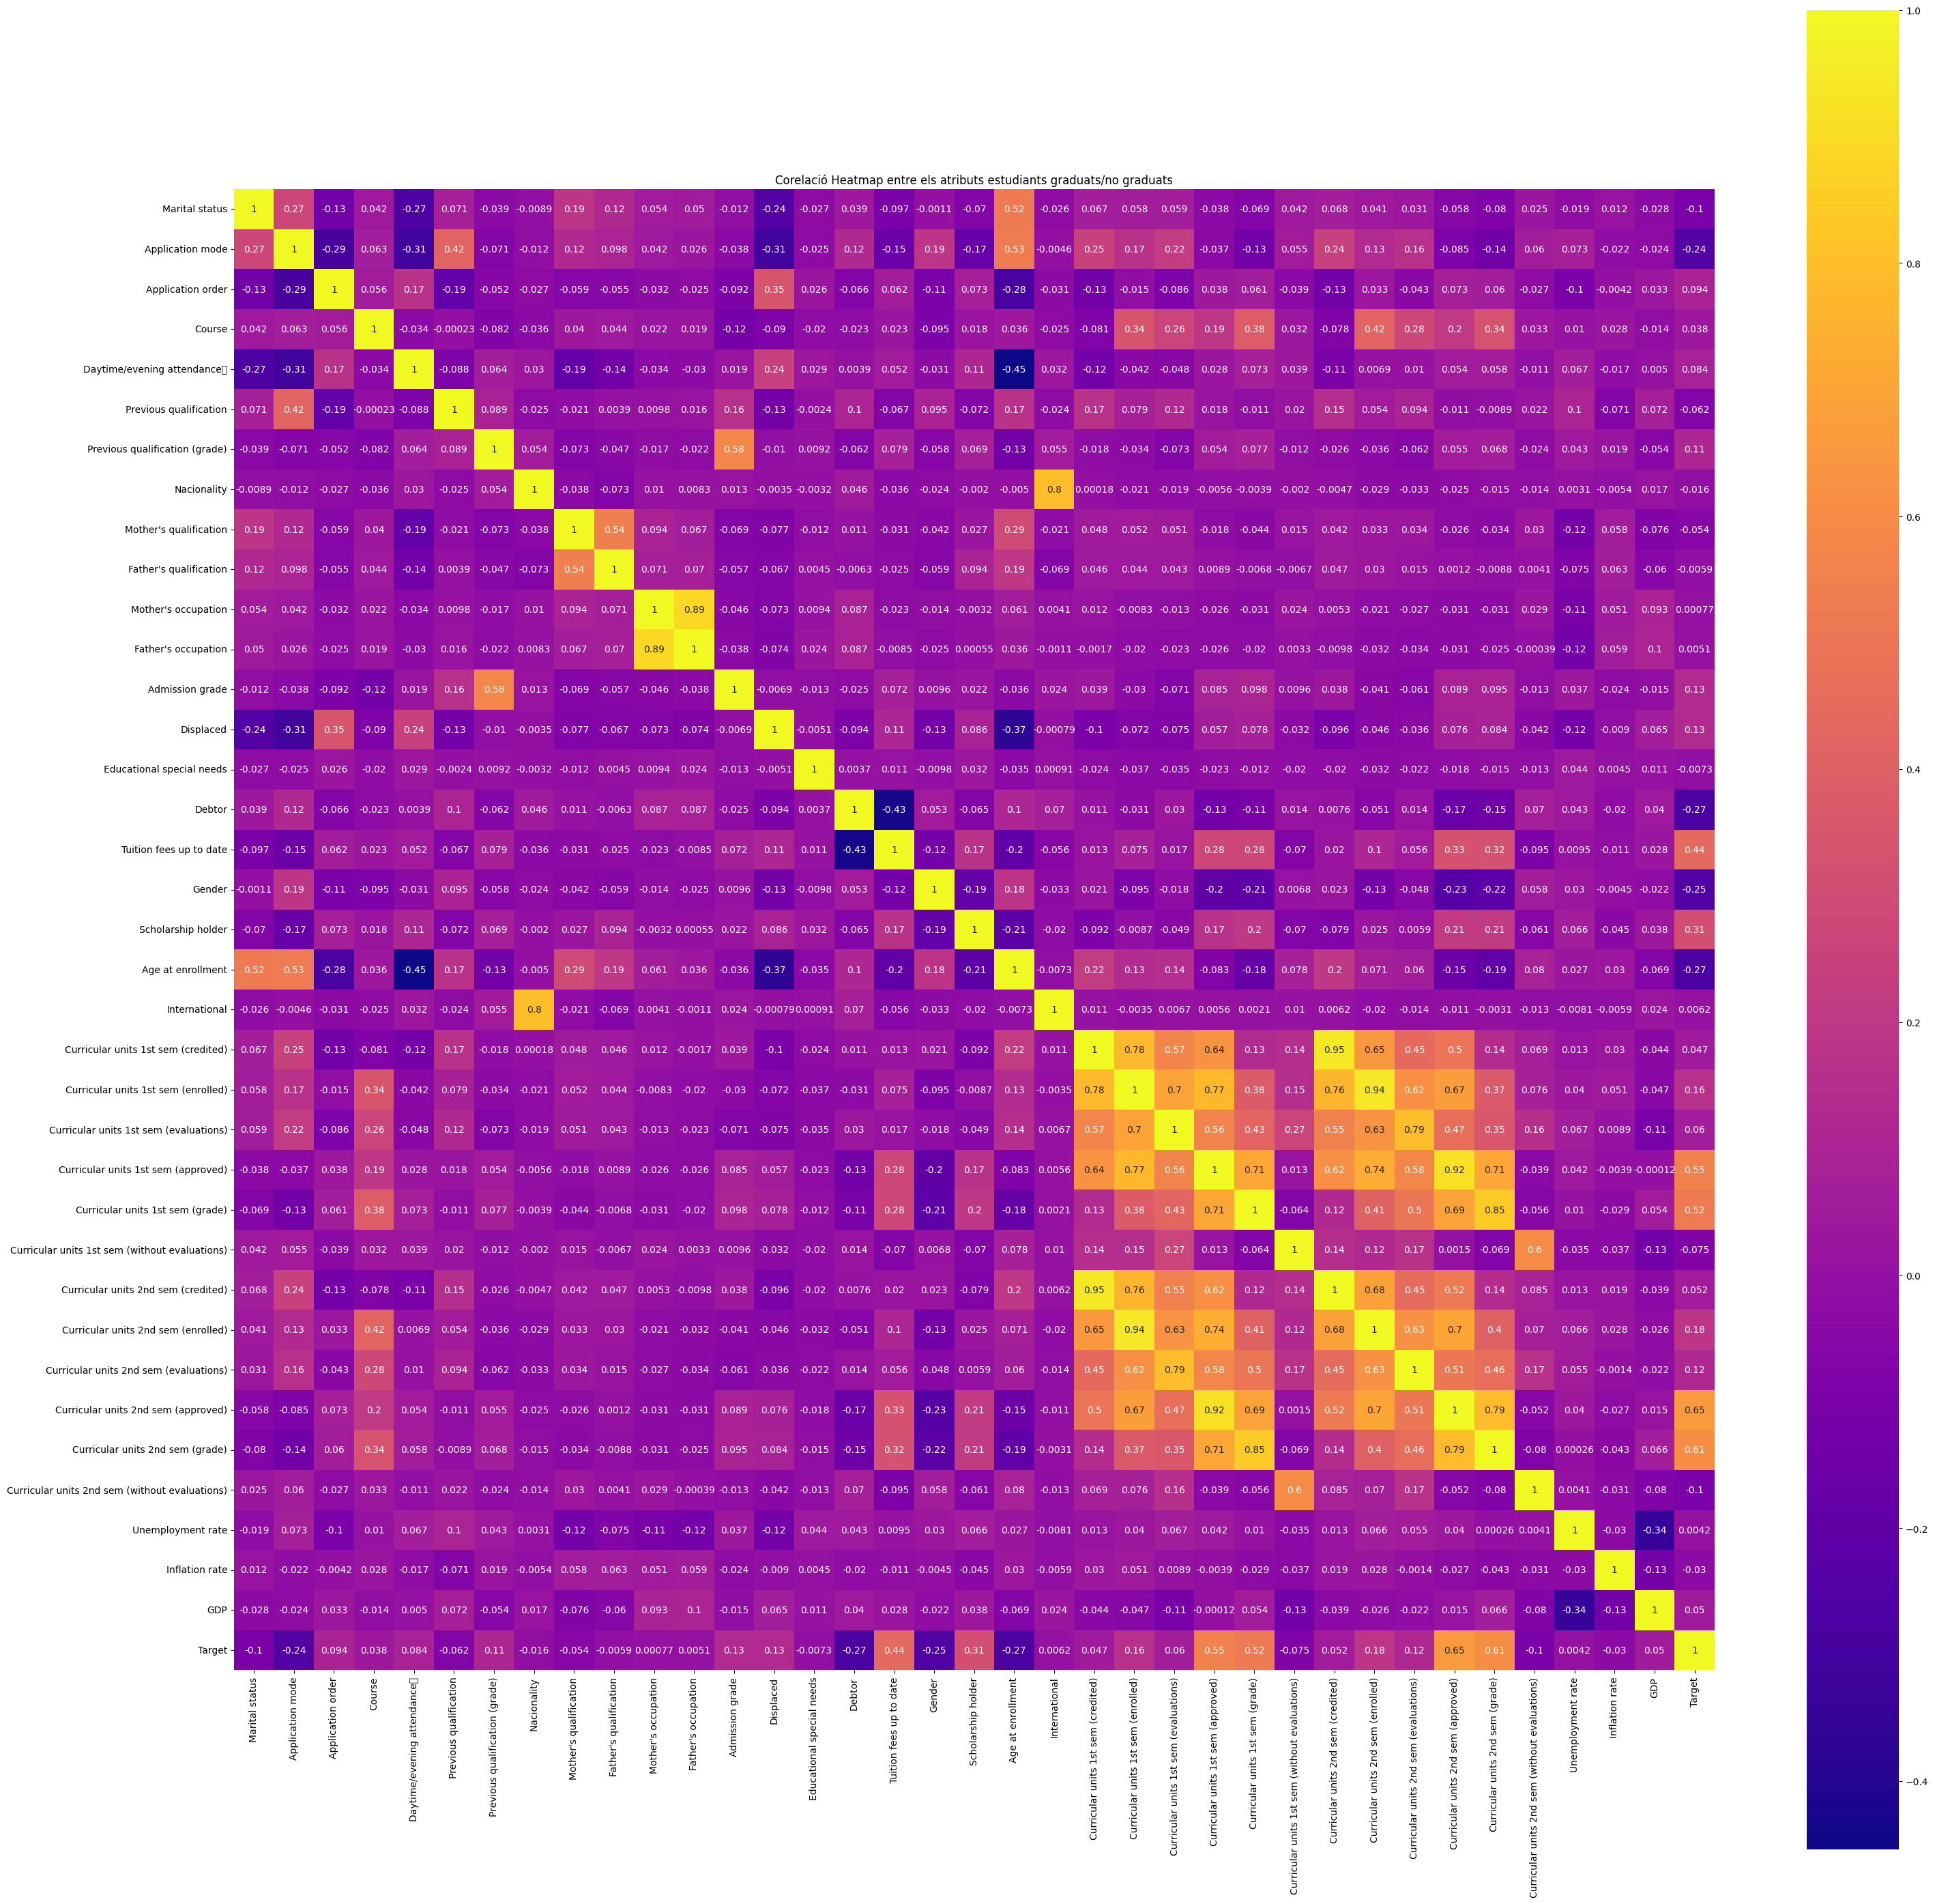

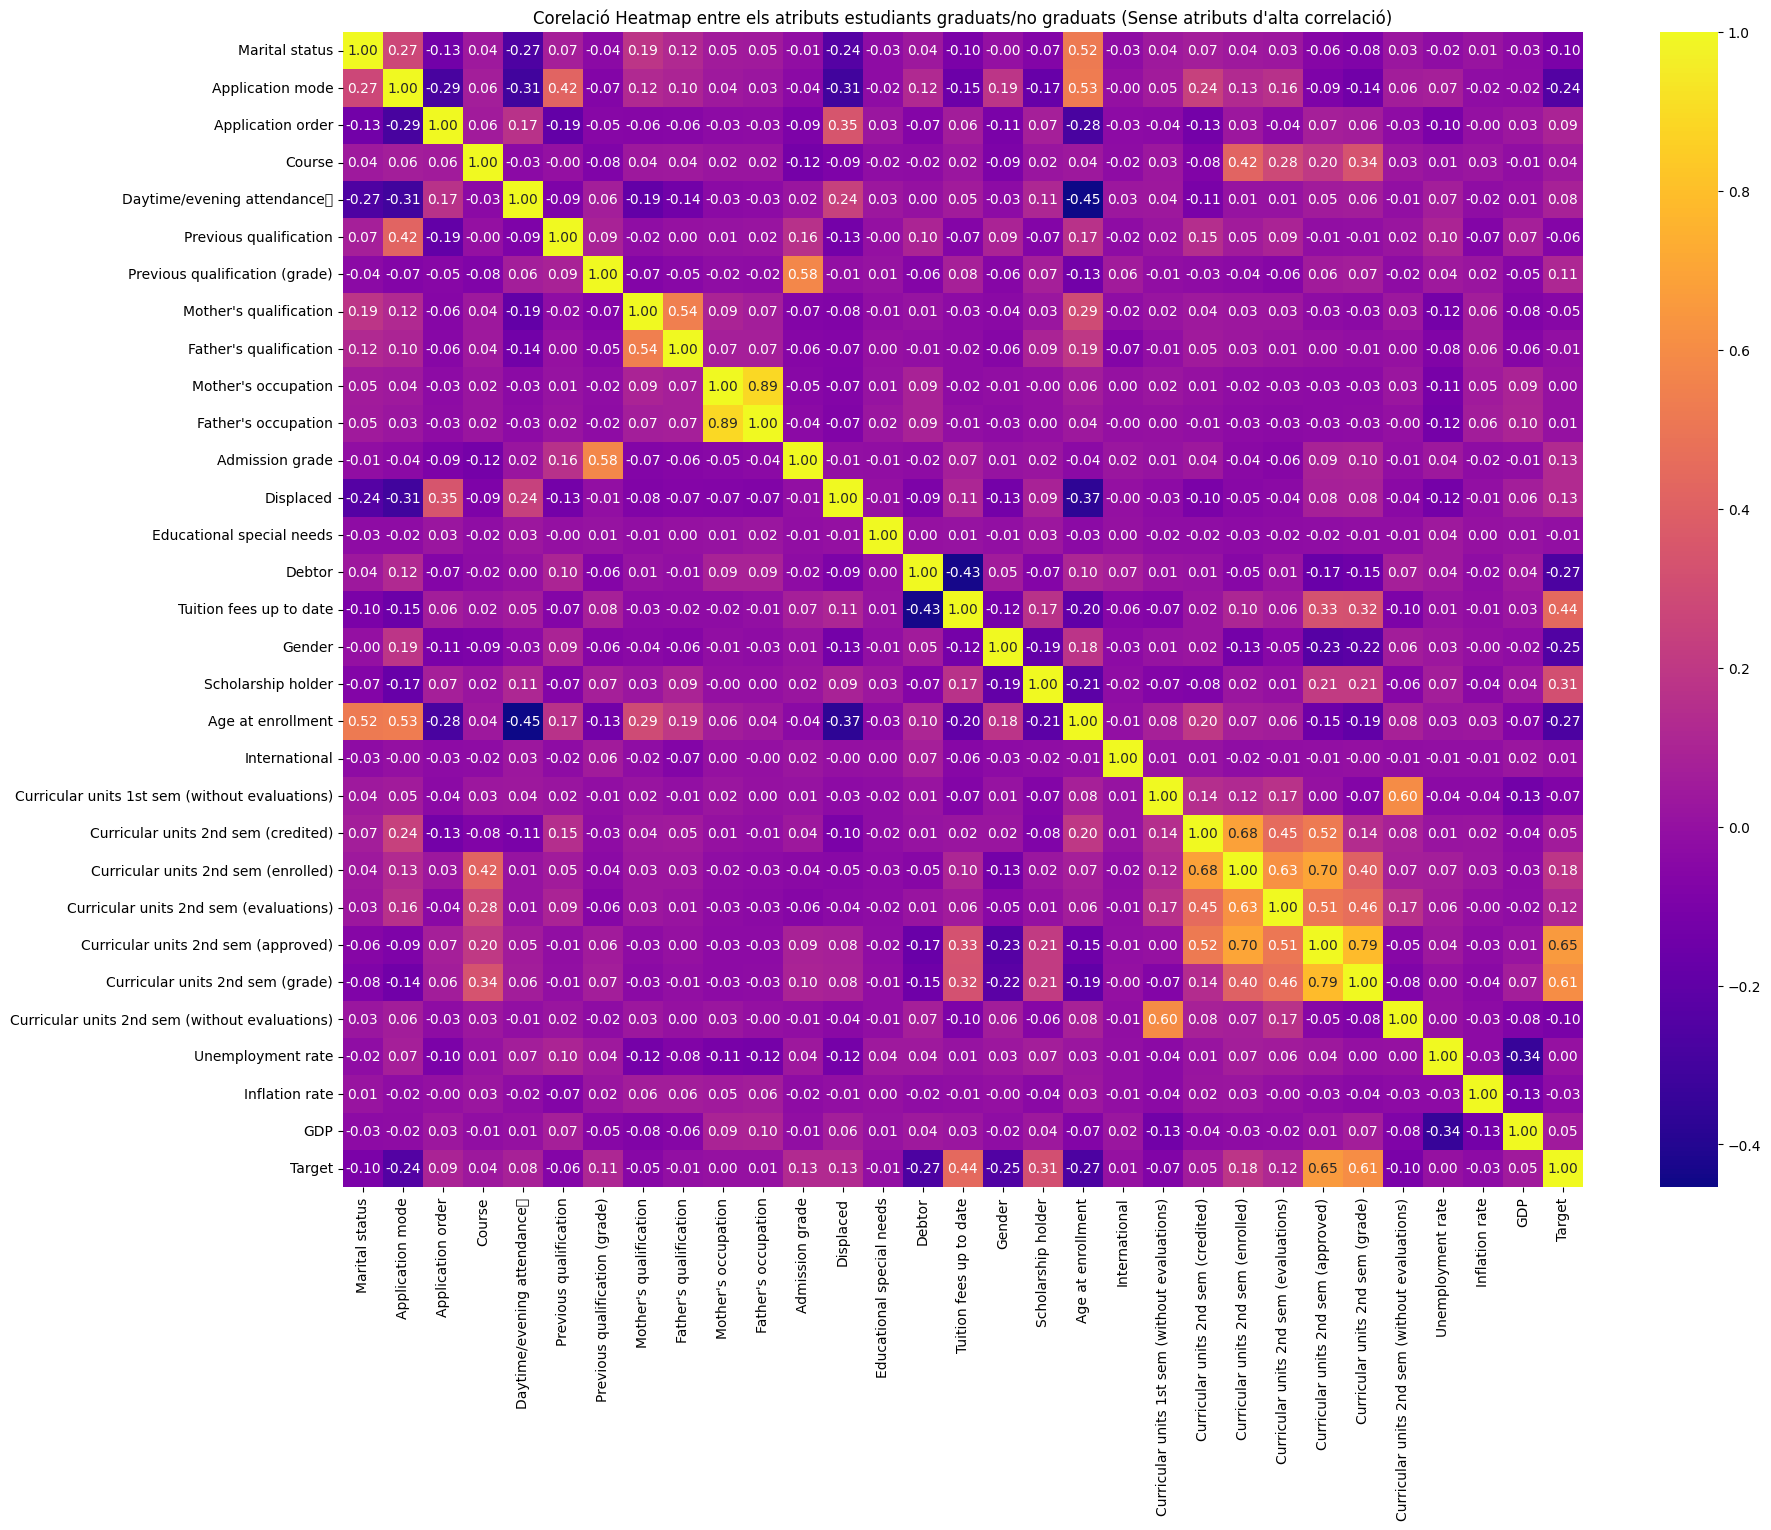

In [ ]:
#dataset preprocessat graduats/no graduats
corr = dades_p.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(corr, cmap='plasma', annot=True, square=True)
plt.title("Corelació Heatmap entre els atributs estudiants graduats/no graduats")
plt.show()

# Correlation Matrix sense els atributs que vols eliminar
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(dades_noat.corr(), annot=True, cmap="plasma", fmt='.2f', annot_kws={"size": 10})
plt.title("Corelació Heatmap entre els atributs estudiants graduats/no graduats (Sense atributs d'alta correlació)")
plt.show()



---


# Data mining models


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [ ]:
#tornar a carregar dades per possibles modificacions anteriors des del DRIVE
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/MIDA/data.csv',sep=';')

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
#No fent servir collab notebook
#Tenint el dataset a la mateixa carpeta del programa

#df=pd.read_csv('data.csv',sep=';')
#df.head()

In [ ]:
#Passar les dades categoriques  a numerals
#Eliminar els estudiants que estan actualment estudiant
dm_data=data.copy()
print("Abans treure estudiants que actualment esta estudien: ")
print(dm_data.loc[:,'Target'].value_counts())

#Treure els estudiants Enrolled -> fixarem en si s'han graduat o no
print("Despres de treure els estudiants que actualment estudien: ")
dm_data=dm_data[(dm_data['Target']=='Graduate') | (dm_data['Target'] == 'Dropout')]
print(dm_data.loc[:,'Target'].value_counts())

#Canviar de categoric a NUMERAL
print("----------")
print("Canviar el target d'un atribut categoric a numeral: ")
dm_data['Target'] = LabelEncoder().fit_transform(dm_data['Target'])
print(dm_data.loc[:,'Target'].value_counts())

print("--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet")

Abans treure estudiants que actualment esta estudien: 
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64
Despres de treure els estudiants que actualment estudien: 
Graduate    2209
Dropout     1421
Name: Target, dtype: int64
----------
Canviar el target d'un atribut categoric a numeral: 
1    2209
0    1421
Name: Target, dtype: int64
--> 1 son els estudiants que s'han graduat i 0 els que no ho han fet


## Single Fold Cross Validation

In [ ]:
#Rellegir dades evitar possibles problemes
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/MIDA/data.csv', sep=';')
data_sf = data.copy()

#Estudiants graduats o han abandonat
data_sf = data_sf[(data_sf['Target'] == 'Graduate') | (data_sf['Target'] == 'Dropout')]

#Passar de categoric a numeral
data_sf['Target'] = LabelEncoder().fit_transform(data_sf['Target'])
data_sf.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(3630, 37)

In [ ]:
#trobar millors parametres- max depth per randomforest
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()

#guardar a X tots els atributs menys el target, a Y el target
X = data_sf.drop('Target', axis=1)
y = data_sf['Target']

scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=10)

param_grid = {'max_depth': [5, 10, 15, 20, None]}


#Grid busqueda per cassificador validation
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=20), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Millor  max_depth trobada:', grid_search.best_params_['max_depth'])

Millor  max_depth trobada: 15



 INFORME MODEL SINGLE FOLD CV 

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       245
           1       0.93      0.97      0.95       481

    accuracy                           0.93       726
   macro avg       0.93      0.91      0.92       726
weighted avg       0.93      0.93      0.93       726


MATRIU DE CONFUSIÓ 


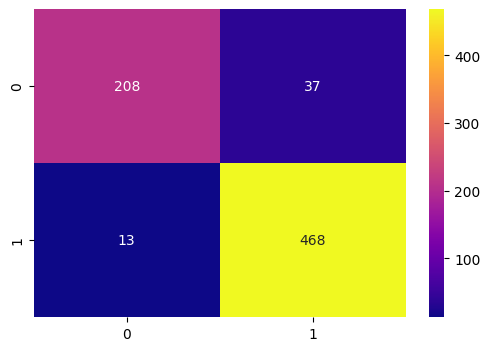


 RESULTATS ACCURACY
Training Accuracy (entrenat): 0.9755509641873278
Testing Accuracy (test): 0.931129476584022


In [ ]:
#Classificadors Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50,max_depth=grid_search.best_params_['max_depth'],min_samples_split=4, min_samples_leaf=2, random_state=20)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

#Fer Prediccions de les dades
y_pred2 = rf.predict(X_test)

print('\n INFORME MODEL SINGLE FOLD CV \n')
print(classification_report(y_test, y_pred2))

#Matriu de confusió
cm = confusion_matrix(y_test, y_pred2)

print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("\n RESULTATS ACCURACY")
print('Training Accuracy (entrenat):',rf.score(X_train,y_train))
print('Testing Accuracy (test):',rf.score(X_test,y_test))


## K-Fold Cross Validation

In [ ]:
#Rellegir dades evitar possibles problemes
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data2 = pd.read_csv('drive/My Drive/MIDA/data.csv', sep=';')
data_kf = data2.copy()

#Estudiants graduats o han abandonat
data_kf = data_kf[(data_kf['Target'] == 'Graduate') | (data_kf['Target'] == 'Dropout')]

#Passar de categoric a numeral
data_kf['Target'] = LabelEncoder().fit_transform(data_kf['Target'])
data_kf.shape

Mounted at /content/drive


(3630, 37)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#guardar a X tots els atributs menys el target, a Y el target
X = data_kf.drop('Target', axis=1)
y = data_kf['Target']

scaled = scaler.fit_transform(X)
X_train_full, X_test, y_train_full, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

#Trobar millor parametre n_neighbors pel model de kfold cross validation
param_grid = {'n_neighbors': range(1, 30)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_full, y_train_full)

print("Millor número n_neighors:",grid_search.best_params_['n_neighbors'])


Millor número n_neighors: 8



 INFORME MODEL K FOLD CV 

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       277
           1       0.78      0.83      0.80       449

    accuracy                           0.75       726
   macro avg       0.73      0.72      0.72       726
weighted avg       0.74      0.75      0.74       726


MATRIU DE CONFUSIÓ 


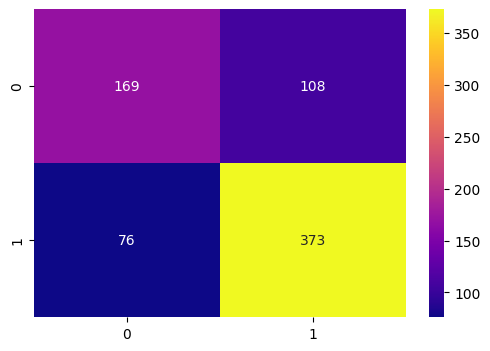


 MITJANES DE CADA FOLD 
Average Accuracy: 0.7623995489346548
Average Precision: 0.7597992879252166
Average Recall: 0.7623995489346548
Average F1 Score: 0.7589954175837326


In [ ]:
# K-Fold Cross-Validation Inicialització
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#metriques
accuracies = []
precisions = []
recalls = []
f1_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[test_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[test_index]

    #Model amb el nombre n_neighbors millor trobat
    model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) #Prediccio per cada fold

    # Calculate metrics
    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val, y_pred, average='weighted'))

#Fer Prediccions de les dades
final_pred = model.predict(X_test)

print('\n INFORME MODEL K FOLD CV \n')
print(classification_report(y_test, final_pred))

#matriu de confusió
cm = confusion_matrix(y_test, final_pred)
print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

# Mitjanes de les k cross-validation
print("\n MITJANES DE CADA FOLD ")
print(f"Average Accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average Precision: {sum(precisions) / len(precisions)}")
print(f"Average Recall: {sum(recalls) / len(recalls)}")
print(f"Average F1 Score: {sum(f1_scores) / len(f1_scores)}")



---


# Machine learning methods


## Naı̈ve Bayes

In [59]:
#Rellegir dades evitar possibles problemes#Rellegir dades evitar possibles problemes
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')

data = pd.read_csv('drive/My Drive/MIDA/data.csv', sep=';')
data_nb = data.copy()

#Estudiants graduats o han abandonat
data_nb = data_nb[(data_nb['Target'] == 'Graduate') | (data_nb['Target'] == 'Dropout')]

#Passar de categoric a numeral
data_nb['Target'] = LabelEncoder().fit_transform(data_nb['Target'])
data_nb.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(3630, 37)

In [60]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
print(data_nb.loc[:,'Target'].value_counts())

scaler = StandardScaler()
#guardar a X tots els atributs menys el target, a Y el target
X = data_nb.drop('Target', axis=1)
y = data_nb['Target']
print(X.shape)
print(y.shape)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=1)

1    2209
0    1421
Name: Target, dtype: int64
(3630, 36)
(3630,)


In [48]:
# trobar millors parametres- best_var_smoothing
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Aplicar a threshold per la probabilitat de les prediccions
def filterp(threshold, probabilities):
    return (probabilities > threshold).astype(int)

#parametres trobar
param_grid_nb = {'var_smoothing': np.logspace(0, -9, num=100)}

#Stratified K-Fold per cross validation
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Model Gaussian Naive Bayes
gnb = GaussianNB()

grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, cv=cv, scoring='accuracy')
grid_search_nb.fit(X, y)

best_var_smoothing = grid_search_nb.best_params_['var_smoothing']
print(f"Millor var_smoothing: {grid_search_nb.best_params_} Accuracy: {grid_search_nb.best_score_}")


Millor var_smoothing: {'var_smoothing': 1e-08} Accuracy: 0.8421487603305785


In [50]:
#Naive Bayes amb millors parametres trobats

gnb = GaussianNB(var_smoothing=grid_search_nb.best_params_['var_smoothing'])
gnb.fit(X_train, y_train)

# Prediccions per la CLASSE 1
probs = gnb.predict_proba(X_test)[:, 1]

# Define thresholds to search for the optimal threshold
thresholds = np.linspace(0, 1, 101)

best_threshold = 0
best_f1_score = 0

#Buscar millor threshold
for threshold in thresholds:
    preds = filterp(threshold, probs)
    f1 = f1_score(y_test, preds, pos_label=1)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f"Best threshold: {best_threshold} with F1-score: {best_f1_score}")

Best threshold: 0.98 with F1-score: 0.8974943052391801



 INFORME MODEL NAIVE BAYES  

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       278
           1       0.92      0.88      0.90       448

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726


MATRIU DE CONFUSIÓ 


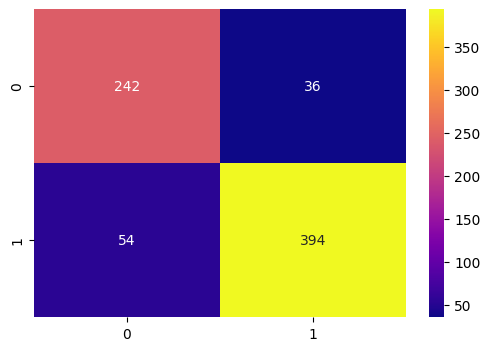


 RESULTATS ACCURACY
Training Accuracy (entrenat): 0.84400826446281
Testing Accuracy (test): 0.8553719008264463


In [51]:
#Millor threshold trobat, aplicar en prediccions
final_preds = filterp(best_threshold, probs)


print('\n INFORME MODEL NAIVE BAYES  \n')
print(classification_report(y_test, final_preds))

#Matriu de confusió
cm = confusion_matrix(y_test, final_preds)

print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("\n RESULTATS ACCURACY")
print('Training Accuracy (entrenat):',gnb.score(X_train,y_train))
print('Testing Accuracy (test):',gnb.score(X_test,y_test))

## k-NN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
from sklearn.preprocessing import StandardScaler,LabelEncoder

%matplotlib inline

In [ ]:
#Rellegir dades evitar possibles problemes
data = pd.read_csv('drive/My Drive/MIDA/data.csv', sep=';')
data_knn = data.copy()

#Estudiants graduats o han abandonat
data_knn = data_knn[(data_knn['Target'] == 'Graduate') | (data_knn['Target'] == 'Dropout')]

#Passar de categoric a numeral
data_knn['Target'] = LabelEncoder().fit_transform(data_knn['Target'])
data_knn.shape

(3630, 37)

In [ ]:
#guardar tot el dataset en X menys el TARGET, guardar el TARGET a y
X=data_knn.drop(["Target"],axis=1)
y=data_knn["Target"]

print(X.shape)
print(y.shape)

(3630, 36)
(3630,)


In [ ]:
#Trobar dummies de les dades, escalarles  i dividir entre training i test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Trobar millor parametre k neigbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

accuracies = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X=X_train, y=y_train, cv=10)
    accuracies.append(np.mean(cv_scores))
    print(f"Accuracy {k} neighbours: {np.mean(cv_scores)}")

Accuracy 1 neighbours: 0.8391918473752813
Accuracy 2 neighbours: 0.8106067069558005
Accuracy 3 neighbours: 0.8522810759568669
Accuracy 4 neighbours: 0.847121696883517
Accuracy 5 neighbours: 0.8574534897499705
Accuracy 6 neighbours: 0.860543903306079
Accuracy 7 neighbours: 0.8505545680767865
Accuracy 8 neighbours: 0.8591669629102974
Accuracy 9 neighbours: 0.8522751510842518


<ipython-input-34-663b6005e761>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,30,2),lr,'b',label='No weighting',color='darkblue')
<ipython-input-34-663b6005e761>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,30,2),lr,'r',label='Weighting', color='deeppink')


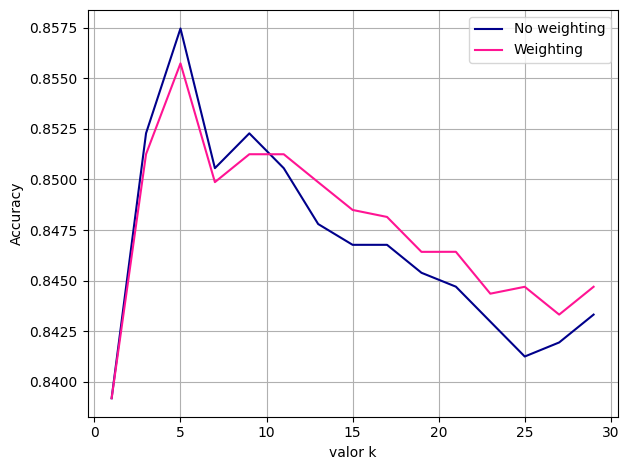

In [ ]:
#Grafic per veure el comportament de K
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting',color='darkblue')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting', color='deeppink')

plt.xlabel('valor k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
#Trobar millors parametres de k neighbors i si weights(pes) millor distancia o uniform
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)
clf.fit(X_train, y_train)

print("Millors Parametres:",clf.best_params_, "Accuracy=", clf.best_score_)

Millors Parametres: {'n_neighbors': 5, 'weights': 'uniform'} Accuracy= 0.8574534897499705



 INFORME MODEL KNN 

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       277
           1       0.83      0.96      0.89       449

    accuracy                           0.86       726
   macro avg       0.88      0.82      0.84       726
weighted avg       0.86      0.86      0.85       726


MATRIU DE CONFUSIÓ 


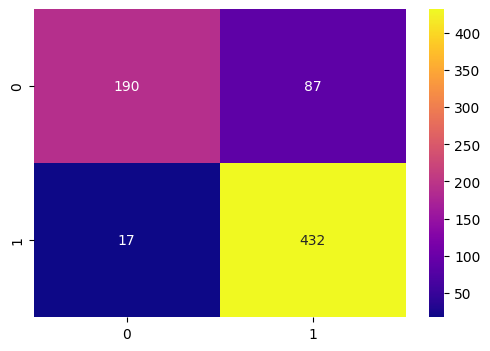


 RESULTATS ACCURACY
Accuracy  0.8567493112947658


In [ ]:
#KNN Classificador

parval=clf.best_params_ #millors parametres calculats
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)

#Fer Prediccions de les dades
pred=knc.predict(X_test)

print('\n INFORME MODEL KNN \n')
print(classification_report(y_test, pred))

#matriu de confusió
cm = confusion_matrix(y_test, pred)
print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("\n RESULTATS ACCURACY")
print("Accuracy ",accuracy_score(y_test, pred))

## Decision Trees




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import sklearn.model_selection as cv
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [ ]:
#Rellegir dades evitar possibles problemes
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/MIDA/data.csv', sep=';')
data_dt = data.copy()

# Filter out certain rows
data_dt = data_dt[(data_dt['Target'] == 'Graduate') | (data_dt['Target'] == 'Dropout')]

# Encode target variable
data_dt['Target'] = LabelEncoder().fit_transform(data_dt['Target'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#guardar tot el dataset en X menys el TARGET, guardar el TARGET a y
X=data_dt.drop(["Target"],axis=1)
y=data_dt["Target"]

print(X.shape)
print(y.shape)

(3630, 36)
(3630,)


In [ ]:
#Trobar dummies, escalar les dades, dividir el dataset entre  training and test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Xn=pd.get_dummies(X)
Xn.head()

Xn, y = shuffle(Xn, y)
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=10)

In [25]:
#Trobar millors parametres per decision tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#Parametres a optimitzar: criteri, profunditat, divisio nodes, valors fulles
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None,2, 5, 10, 20, 30],
    'min_impurity_decrease': [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4],
}
# crear model
clf = tree.DecisionTreeClassifier()

# Utilitzar GridSearch trobar els parametres mes optimitzats
grid_search = GridSearchCV(clf, param_grid, cv=5)¡
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

#Obtenir els parametres trobats
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Millors Parameters:", best_params, " Accuracy:", best_accuracy)

Millors Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 25}  Accuracy: 0.8922232773458365


In [28]:
#Decision Tree
#Imprimir l'arbre
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

best_tree = grid_search.best_estimator_ #millors parametres calculats
best_tree.fit(X_train, y_train)

plt.figure(figsize=(200, 100))
tree.plot_tree(best_tree, filled=True, rounded=True, feature_names=list(Xn.columns.values))
plt.title("Arbre de Decisió ")
plt.show()


 INFORME MODEL DECISION TREE 

              precision    recall  f1-score   support

           0       0.95      0.83      0.88       288
           1       0.89      0.97      0.93       438

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726


MATRIU DE CONFUSIÓ 


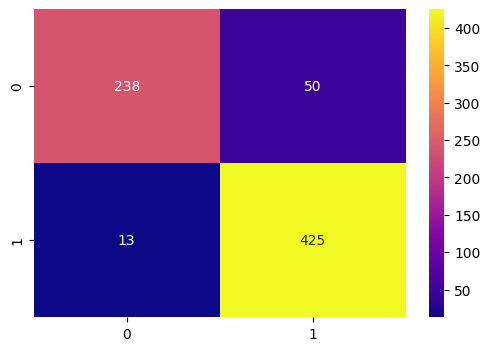


 RESULTATS MODEL
Accuracy  0.9132231404958677
Interval of confidence: (0.8906489244766083, 0.9320104152633979)


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns

#Prediccio de les dades
pred = best_tree.predict(X_test)


print('\n INFORME MODEL DECISION TREE \n')
print(classification_report(y_test, pred))

#matriu de confusió
cm = confusion_matrix(y_test, pred)
print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("\n RESULTATS MODEL")
print("Accuracy ",accuracy_score(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))


## Support Vector Machines

In [ ]:
#https://github.com/nravi95/Predictive-analysis-on-Students-Dropout-and-Academic-Success-by-using-machine-learning-models./blob/main/students%20project%20(1)%20(3).ipynb
#https://github.com/nravi95/Predictive-analysis-on-Students-Dropout-and-Academic-Success-by-using-machine-learning-models./blob/main/SVM%20iris%20data.ipynb


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
#Rellegir dades evitar possibles problemes
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/MIDA/data.csv', sep=';')
data_svm = data.copy()

#Estudiants graduats o han abandonat
data_svm = data_svm[(data_svm['Target'] == 'Graduate') | (data_svm['Target'] == 'Dropout')]

#Passar de categoric a numeral
data_svm['Target'] = LabelEncoder().fit_transform(data_svm['Target'])
data_svm.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(3630, 37)

In [ ]:
X = data_svm.drop('Target', axis=1)
y = data_svm['Target']
print(X.shape)
print(y.shape)

(3630, 36)
(3630,)


In [ ]:
#Trobar dummies de les dades, escalarles  i dividir entre training i test
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming X and y are your features and labels

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the training data and transform both training and test sets
X_train_ = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mirar pels diferents tipus de kernel que poden tenir el model de suport vectors machines:


*  linear
*  rbf
*  poly



### SVM linear


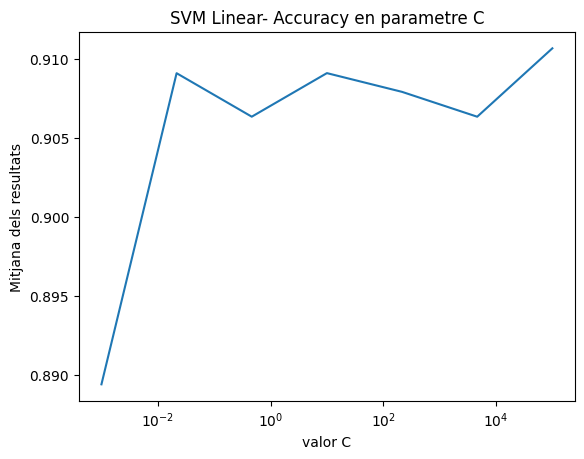

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


RESULTATS KERNEL SVM LINEAR:

MATRIU DE CONFUSIÓ 


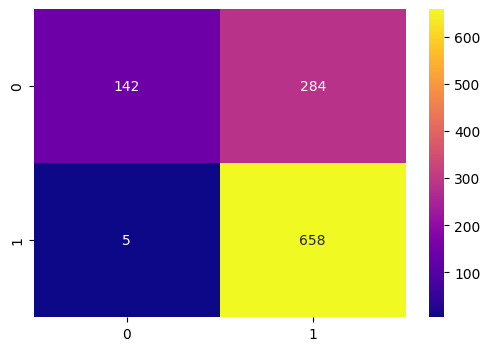

ACCURACY en el test set:  0.7346189164370982
Millor parametre C:  100000.0
Numero de suports:  440
Proporció dels supports:  0.17316017316017315


In [ ]:
#Optimitzar SVM linear i els seus parametres
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

#Trobar cs amb grid search
Cs = np.logspace(-3, 5, num=7, base=10.0)
param_grid_linear = {'C': Cs, 'kernel': ['linear']}
grid_search_linear = GridSearchCV(SVC(), param_grid_linear, cv=10)
grid_search_linear.fit(X_train, y_train)

#Grafic de resultats de Accuracy depenen valors de C
scores_linear = grid_search_linear.cv_results_['mean_test_score']
plt.semilogx(Cs, scores_linear)
plt.title('SVM Linear- Accuracy en parametre C')
plt.xlabel('valor C')
plt.ylabel('Mitjana dels resultats')
plt.show()

best_C_linear = grid_search_linear.best_params_['C'] #trobat millor C

#Aplicar millor parametre
svm_linear = SVC(kernel='linear', C=best_C_linear)
svm_linear.fit(X_train, y_train)
pred_linear = svm_linear.predict(X_test)

#Resultats

print("RESULTATS KERNEL SVM LINEAR:")

cm = confusion_matrix(y_test, pred_linear)

print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("ACCURACY en el test set: ", accuracy_score(y_test, pred_linear))
print("Millor parametre C: ", best_C_linear)
print("Numero de suports: ", np.sum(svm_linear.n_support_))
print("Proporció dels supports: ", np.sum(svm_linear.n_support_)/X_train.shape[0])


In [ ]:
# Linear Kernel SVM
param_grid_linear = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear']}
grid_search_linear = GridSearchCV(SVC(), param_grid_linear, cv=5, verbose=1)
grid_search_linear.fit(X_train, y_train)

best_params_linear = grid_search_linear.best_params_
best_score_linear = grid_search_linear.best_score_
print(f"Linear Kernel: Best Score = {best_score_linear:.4f}, Best Params = {best_params_linear}")

# Evaluate on test set
best_model_linear = grid_search_linear.best_estimator_
y_pred_linear = best_model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel: Test Accuracy = {accuracy_linear:.4f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Linear Kernel: Best Score = 0.9083, Best Params = {'C': 0.1, 'kernel': 'linear'}
Linear Kernel: Test Accuracy = 0.9036


### SVM poly

Fitting 3 folds for each of 12 candidates, totalling 36 fits


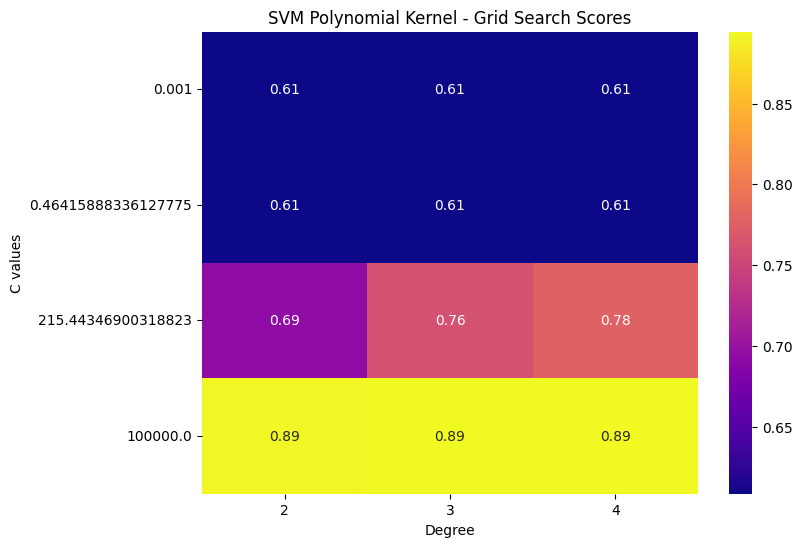

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


RESULTS FOR POLYNOMIAL KERNEL SVM:

CONFUSION MATRIX:


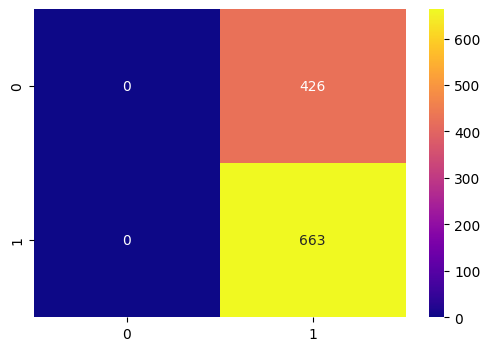

ACCURACY on the test set:  0.6088154269972452
Best parameters:  {'C': 100000.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Number of supports:  757
Proportion of supports:  0.2979142070051161


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, y_train, X_test, y_test are already defined

# Define C values and parameter grid for Polynomial Kernel SVM
Cs = np.logspace(-3, 5, num=4, base=10.0)
param_grid_poly = {'C': Cs, 'kernel': ['poly'], 'degree': [2, 3,4], 'gamma': ['scale']}
grid_search_poly = GridSearchCV(SVC(), param_grid_poly, cv=3, n_jobs=-1, verbose=1)
grid_search_poly.fit(X_train, y_train)

# Reshape the scores for heatmap plotting
scores_poly = grid_search_poly.cv_results_['mean_test_score']
scores_poly_reshaped = np.array(scores_poly).reshape(len(Cs), len(param_grid_poly['degree']))

# Plotting the heatmap of cross-validation accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(scores_poly_reshaped, annot=True, xticklabels=param_grid_poly['degree'], yticklabels=Cs, cmap="plasma")
plt.xlabel('Degree')
plt.ylabel('C values')
plt.title('SVM Polynomial Kernel - Grid Search Scores')
plt.show()

# Apply the best parameters
best_params_poly = grid_search_poly.best_params_
svm_poly = SVC(kernel='poly', C=best_params_poly['C'], degree=best_params_poly['degree'],
               gamma=best_params_poly['gamma'])
svm_poly.fit(X_train, y_train)
pred_poly = svm_poly.predict(X_test)

# Results for Polynomial Kernel SVM
print("RESULTS FOR POLYNOMIAL KERNEL SVM:")

# Confusion Matrix
cm_poly = confusion_matrix(y_test, pred_poly)
print("\nCONFUSION MATRIX:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="plasma")
plt.show()

# Accuracy
print("ACCURACY on the test set: ", accuracy_score(y_test, pred_poly))
print("Best parameters: ", best_params_poly)
print("Number of supports: ", np.sum(svm_poly.n_support_))
print("Proportion of supports: ", np.sum(svm_poly.n_support_)/X_train.shape[0])


### SVM rbf

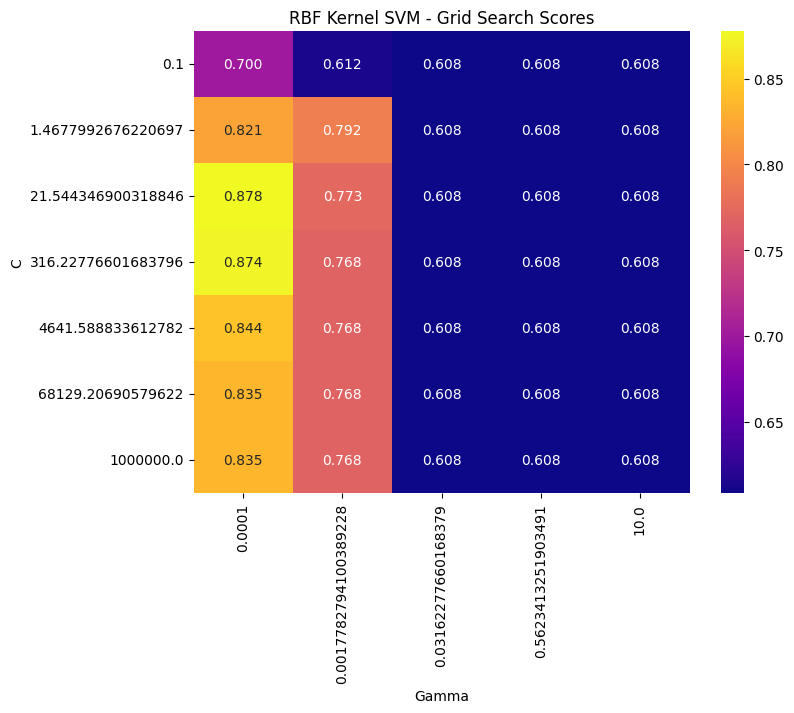

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


RBF Kernel SVM Results:

Confusion Matrix:


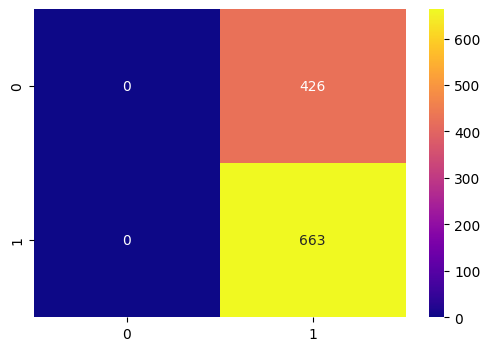

Accuracy on test set:  0.6088154269972452
Best parameters:  {'C': 21.544346900318846, 'gamma': 0.0001, 'kernel': 'rbf'}
Number of supports:  984
Proportion of supports:  0.3872491145218418


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Values to test for each parameter. Consider the range of values and adjust if necessary.
gammas = np.logspace(-4, 1, num=5, base=10.0)
Cs = np.logspace(-1, 6, num=7, base=10.0)

# Define the parameter grid for RBF Kernel SVM
param_grid_rbf = {'C': Cs, 'gamma': gammas, 'kernel': ['rbf']}
grid_search_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5)
grid_search_rbf.fit(X_train, y_train)

# Plotting the results of accuracy depending on C and gamma
scores_rbf = grid_search_rbf.cv_results_['mean_test_score']
scores_rbf = np.array(scores_rbf).reshape(len(Cs), len(gammas))

plt.figure(figsize=(8, 6))
sns.heatmap(scores_rbf, annot=True, fmt=".3f", xticklabels=gammas, yticklabels=Cs, cmap="plasma")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('RBF Kernel SVM - Grid Search Scores')
plt.show()

# Best parameters found for RBF Kernel SVM
best_params_rbf = grid_search_rbf.best_params_

# Apply the best parameters to train the model
svm_rbf = SVC(kernel='rbf', C=best_params_rbf['C'], gamma=best_params_rbf['gamma'])
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)

# Display results
print("RBF Kernel SVM Results:")
cm_rbf = confusion_matrix(y_test, pred_rbf)
print("\nConfusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="plasma")
plt.show()

print("Accuracy on test set: ", accuracy_score(y_test, pred_rbf))
print("Best parameters: ", best_params_rbf)
print("Number of supports: ", np.sum(svm_rbf.n_support_))
print("Proportion of supports: ", np.sum(svm_rbf.n_support_)/X_train.shape[0])



## Meta-learning algorithms

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline

In [ ]:
#Rellegir dades evitar possibles problemes
from google.colab import drive

#from google.colab import drive -demana permis a llegir el DRIVE
drive.mount('/content/drive')
data = pd.read_csv('drive/My Drive/MIDA/data.csv', sep=';')
data_mt = data.copy()

#Estudiants graduats o han abandonat
data_mt = data_mt[(data_mt['Target'] == 'Graduate') | (data_mt['Target'] == 'Dropout')]

#Passar de categoric a numeral
data_mt['Target'] = LabelEncoder().fit_transform(data_mt['Target'])
data_mt.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(3630, 37)

In [ ]:
X = data_mt.drop('Target', axis=1)
y = data_mt['Target']
print(X.shape)
print(y.shape)

(3630, 36)
(3630,)


In [ ]:
#Trobar dummies de les dades, escalarles  i dividir entre training i test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


####Classificadors individuals


*   Gaussian Naive Bayes
*   K-Nearest Neigbors
*   Decision Tree



In [ ]:
# Gaussian Naive Bayes
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

cv = 50
clf1 = GaussianNB()
scores = cross_val_score(clf1, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f de Naive Bayes" % scores.mean())


Accuracy: 0.839 de Naive Bayes


In [ ]:
#K-Nearest Neigbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': list(range(1, 30, 2)), 'weights': ('distance', 'uniform')}
knc = KNeighborsClassifier()
clf_knn = GridSearchCV(knc, param_grid=params, cv=cv, n_jobs=-1)  # If cv is integer, by default it's Stratified
clf_knn.fit(X, y)
print("Millors parametres per KNN =", clf_knn.best_params_, "Accuracy =", clf_knn.best_score_)

#Utilitzar els parametres trobats per knn
clf2 = KNeighborsClassifier(n_neighbors=clf_knn.best_params_['n_neighbors'], weights=clf_knn.best_params_['weights'])
scores = cross_val_score(clf2, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f  de KNN " % scores.mean())


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(clf3, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f de Decision Tree" % scores.mean())

####Voting pels classificadors individuals

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting: Hard voting"))

In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting: Soft voting"))

In [ ]:
scl = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2),('dt',clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(scl, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Stacking: Soft voting"))

#### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]: #utilitzar max nombre d'estimadors
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

#fent servir un sol tipus de classificador: decision tree
#mirar la tendencia veient com es van posant mes features


####Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]: #executar PROJECTE max valor possible
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())



####AdaBoost

####Comparacions metodes: